In [90]:
!pip install resampy

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa 
import librosa.display

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
os.chdir(r"/kaggle/input/binary-drone-audio/Binary_drone_audio")

In [4]:
path=os.getcwd()
file_name1="unknown"
file_name2="yes_drone"
unknown_audio_path=os.path.join(path,file_name1)
drone_audio_path=os.path.join(path,file_name2)
print("The path for unknown audio is : ",unknown_audio_path)
print("The path for drone audio is   : ",drone_audio_path) 

The path for unknown audio is :  /kaggle/input/binary-drone-audio/Binary_drone_audio/unknown
The path for drone audio is   :  /kaggle/input/binary-drone-audio/Binary_drone_audio/yes_drone


In [5]:
def get_file_paths(dirname):
    file_paths = []  
    for root, directories, files in os.walk(dirname):
        for filename in files:
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)  
    return file_paths 

In [6]:
unknown_audio = get_file_paths(unknown_audio_path)
drone_audio = get_file_paths(drone_audio_path)

In [7]:
drone_audio[24]

'/kaggle/input/binary-drone-audio/Binary_drone_audio/yes_drone/B_S2_D1_081-bebop_004_.wav'

In [8]:
unknown_audio[45]

'/kaggle/input/binary-drone-audio/Binary_drone_audio/unknown/3-51731-A-424.wav'

In [9]:
len(drone_audio)

1332

In [10]:
unknown_audio = unknown_audio[0:1500]

In [11]:
len(unknown_audio)

1500

Sample rate :  22050


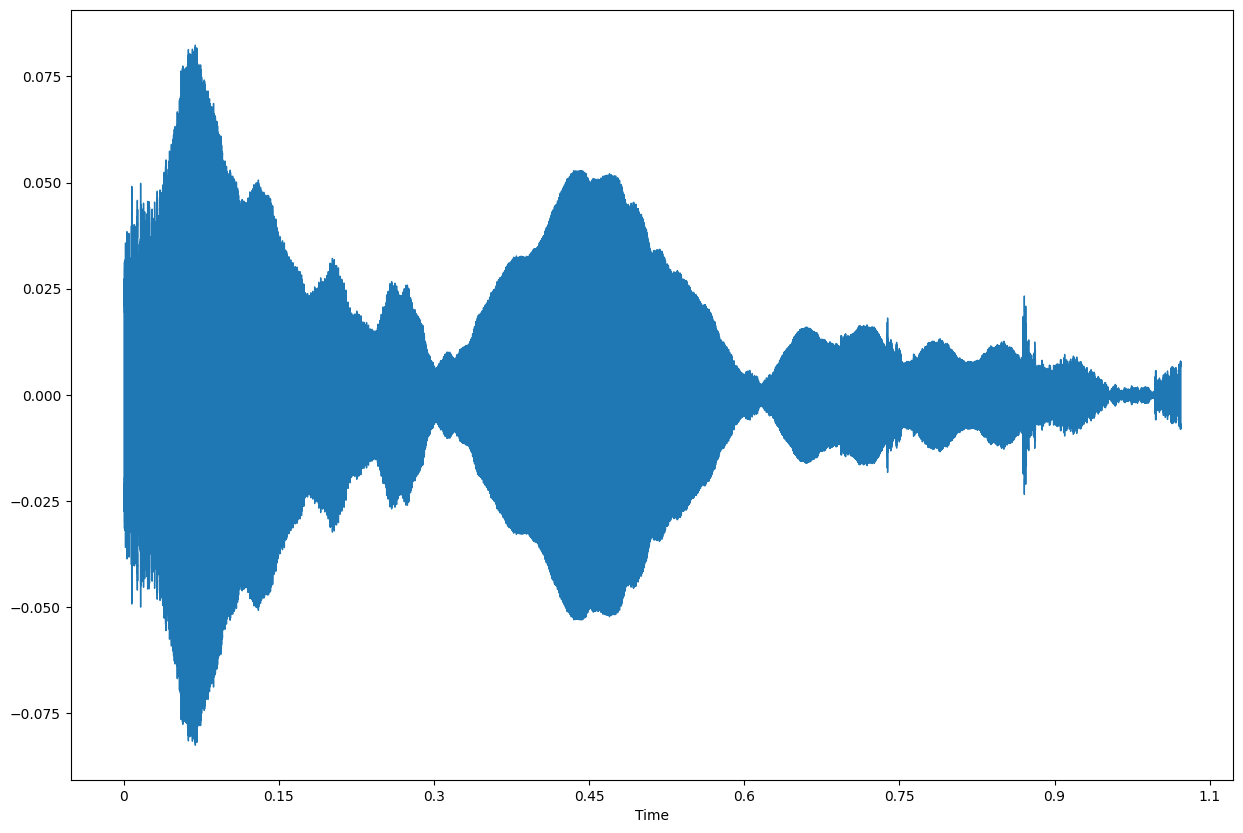

In [12]:
import IPython.display as ipd

plt.figure(figsize=(15,10))
filename=unknown_audio[220]
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
print("Sample rate : " , sample_rate)
ipd.Audio(filename)

In [13]:
data

array([ 0.02480546,  0.0273703 ,  0.02093742, ..., -0.00758825,
       -0.00560857,  0.        ], dtype=float32)

Sample rate :  22050


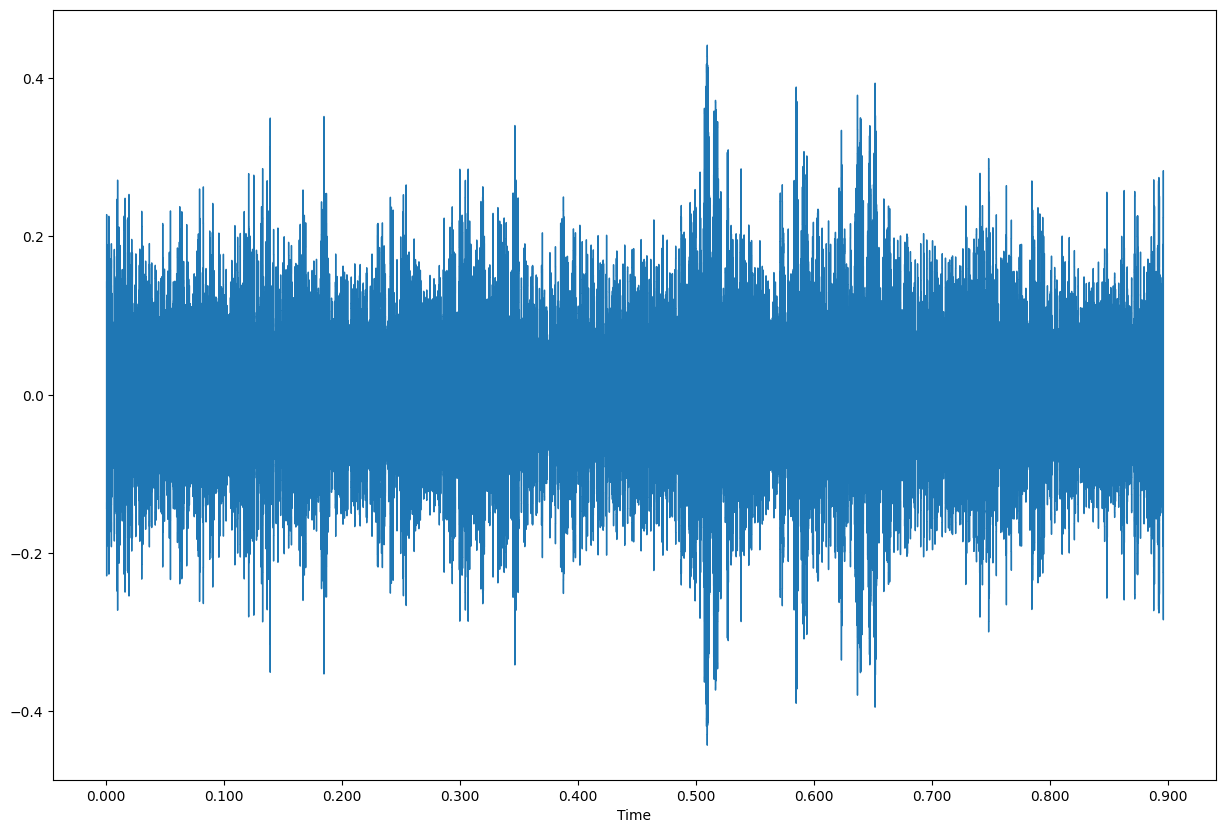

In [14]:
plt.figure(figsize=(15,10))
filename2=drone_audio[200]
data2,sample_rate2=librosa.load(filename2)
librosa.display.waveshow(data2, sr=sample_rate2)
print("Sample rate : " , sample_rate2)
ipd.Audio(filename2)

In [15]:
data2

array([-0.14345974, -0.228187  , -0.1354616 , ..., -0.22387198,
       -0.28368977, -0.15855463], dtype=float32)

In [16]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)
print("Actual sample rate : " , wave_sample_rate )
print("Wave audio : " , wave_audio)

Actual sample rate :  16000
Wave audio :  [ 863  799  683 ... -223 -229 -209]


In [17]:
wave_sample_rate2, wave_audio2 = wav.read(filename2)
print("Actual sample rate : " , wave_sample_rate2 )
print("Wave audio : " , wave_audio2)

Actual sample rate :  16000
Wave audio :  [-4839 -6919 -1853 ... -6067 -7275 -8585]


**EXPLORATORY DATA ANALYSIS**

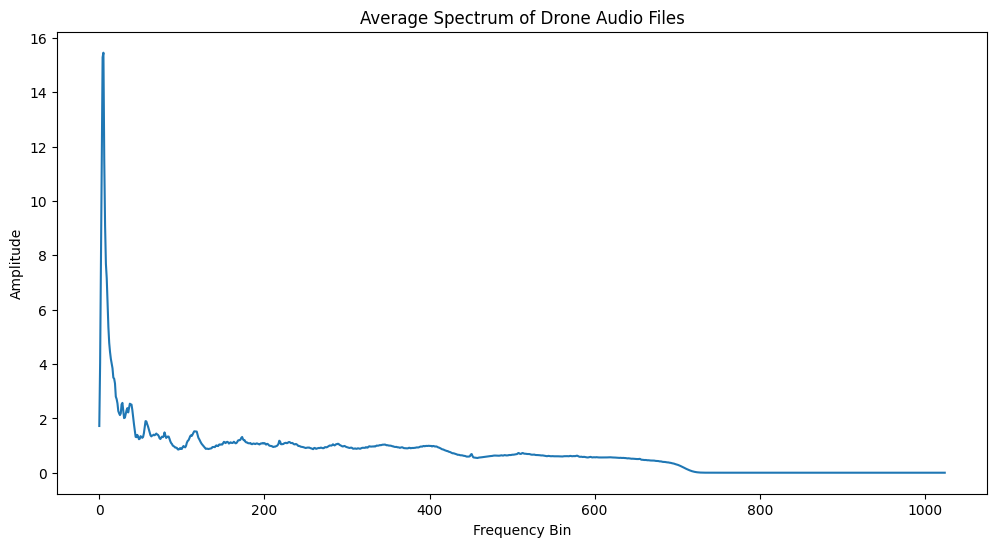

In [18]:
def average_spectrum(files, sr=22050):
    spectra = []

    for file in files:
        audio, _ = librosa.load(file, sr=sr)
        stft = np.abs(librosa.stft(audio))
        avg_spectrum = np.mean(stft, axis=1)
        spectra.append(avg_spectrum)

    mean_spectrum = np.mean(np.array(spectra), axis=0)
    return mean_spectrum

mean_spectrum_drone = average_spectrum(drone_audio)

plt.figure(figsize=(12, 6))
plt.plot(mean_spectrum_drone)
plt.title("Average Spectrum of Drone Audio Files")
plt.xlabel("Frequency Bin")
plt.ylabel("Amplitude")
plt.show()

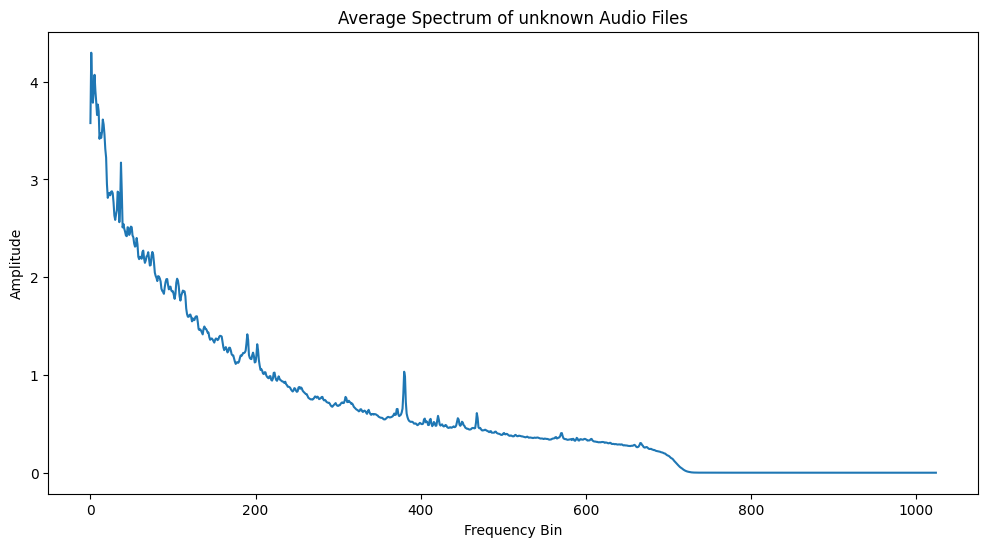

In [19]:
mean_spectrum_unknown = average_spectrum(unknown_audio)

plt.figure(figsize=(12, 6))
plt.plot(mean_spectrum_unknown)
plt.title("Average Spectrum of unknown Audio Files")
plt.xlabel("Frequency Bin")
plt.ylabel("Amplitude")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


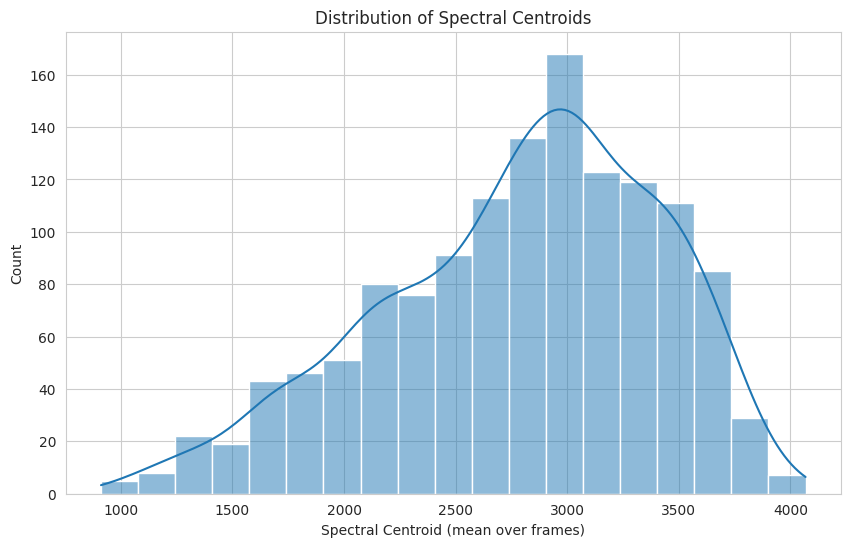

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


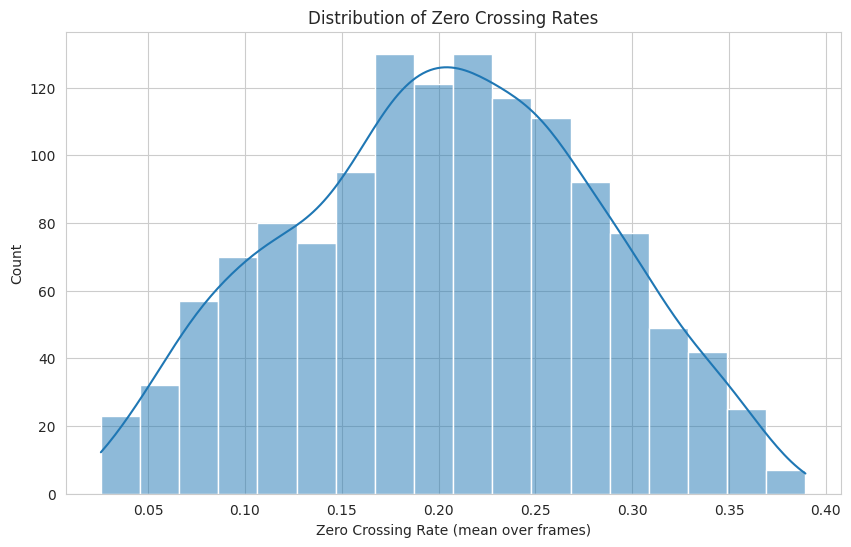

In [20]:
spectral_centroids = []
zero_crossing_rates = []

for file in drone_audio:
    audio, sr = librosa.load(file, sr=None)

    sc = librosa.feature.spectral_centroid(y = audio, sr=sr)[0]
    spectral_centroids.append(np.mean(sc))

    zcr = librosa.feature.zero_crossing_rate(audio)[0]
    zero_crossing_rates.append(np.mean(zcr))

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(spectral_centroids, kde=True)
plt.title('Distribution of Spectral Centroids')
plt.xlabel('Spectral Centroid (mean over frames)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(zero_crossing_rates, kde=True)
plt.title('Distribution of Zero Crossing Rates')
plt.xlabel('Zero Crossing Rate (mean over frames)')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


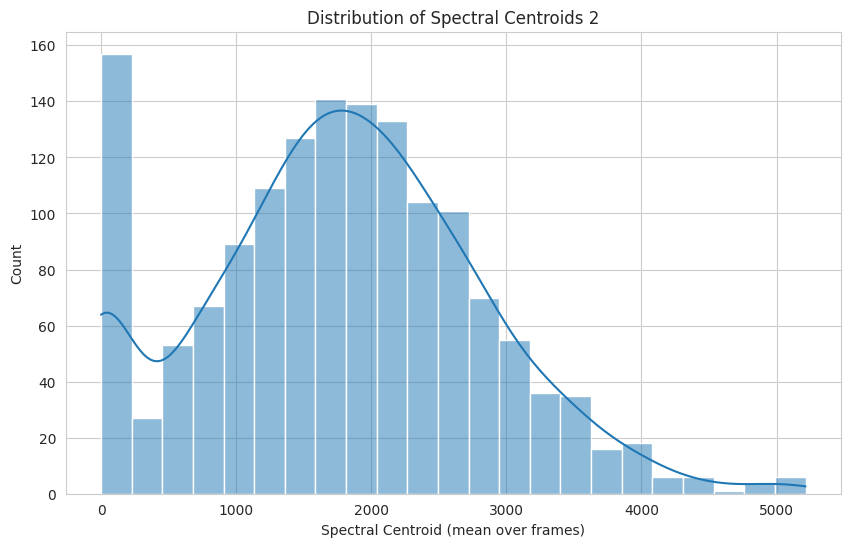

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


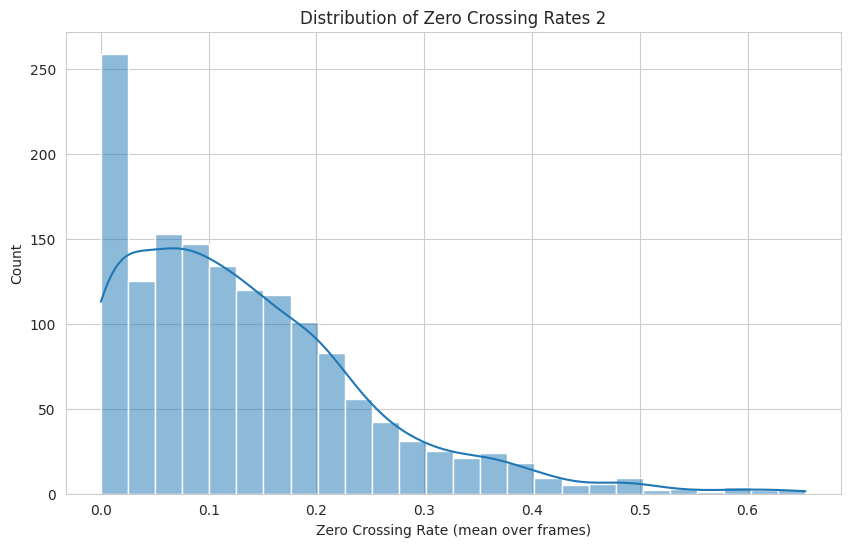

In [21]:
spectral_centroids2 = []
zero_crossing_rates2 = []

for file in unknown_audio:
    audio, sr = librosa.load(file, sr=None)

    sc = librosa.feature.spectral_centroid(y = audio, sr=sr)[0]
    spectral_centroids2.append(np.mean(sc))

    zcr = librosa.feature.zero_crossing_rate(audio)[0]
    zero_crossing_rates2.append(np.mean(zcr))

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(spectral_centroids2, kde=True)
plt.title('Distribution of Spectral Centroids 2')
plt.xlabel('Spectral Centroid (mean over frames)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(zero_crossing_rates2, kde=True)
plt.title('Distribution of Zero Crossing Rates 2')
plt.xlabel('Zero Crossing Rate (mean over frames)')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


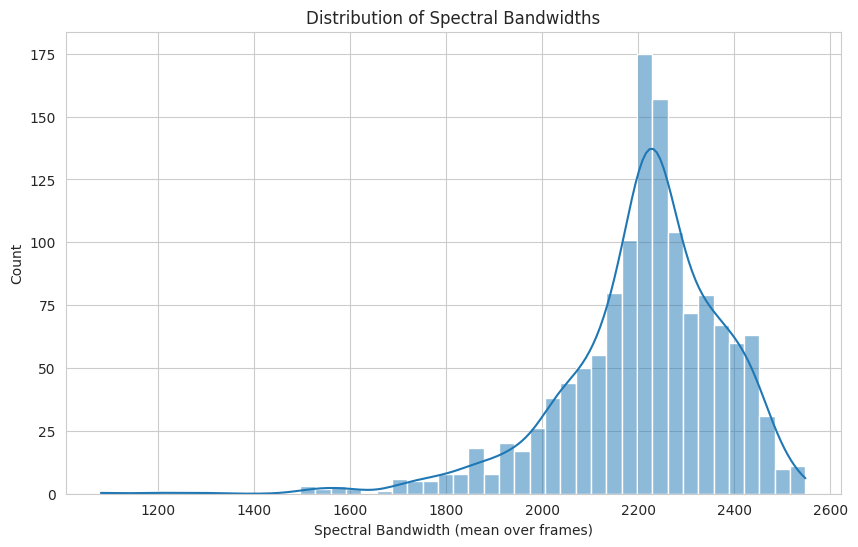

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


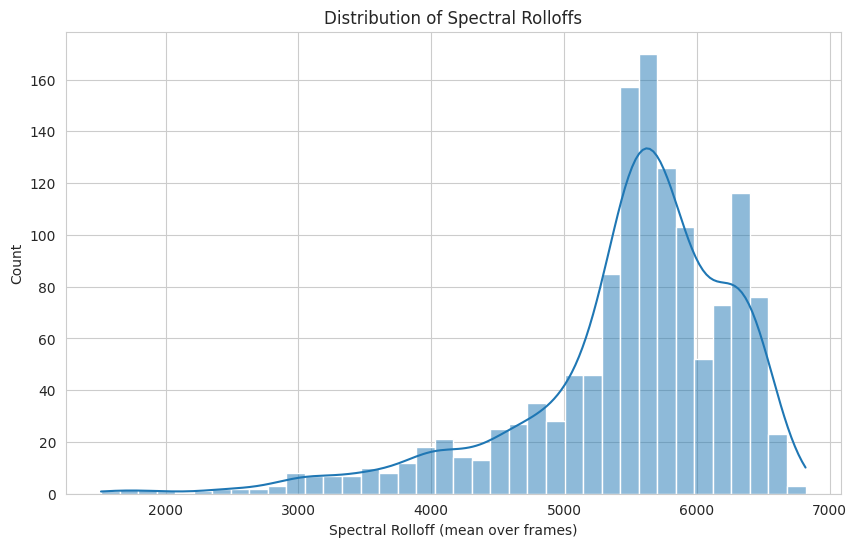

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


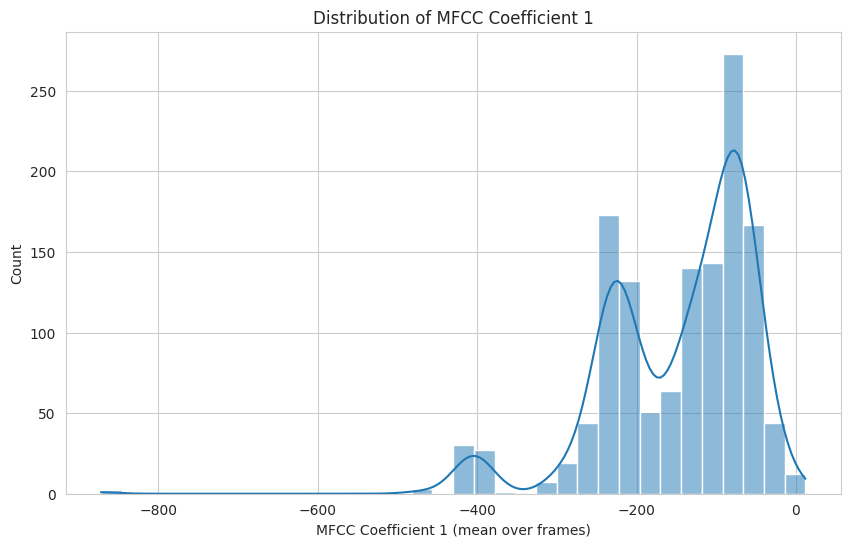

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


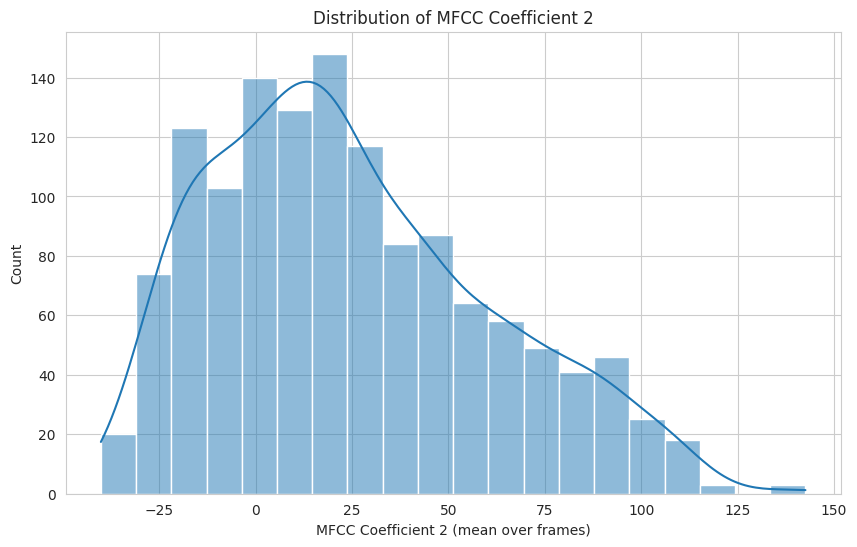

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


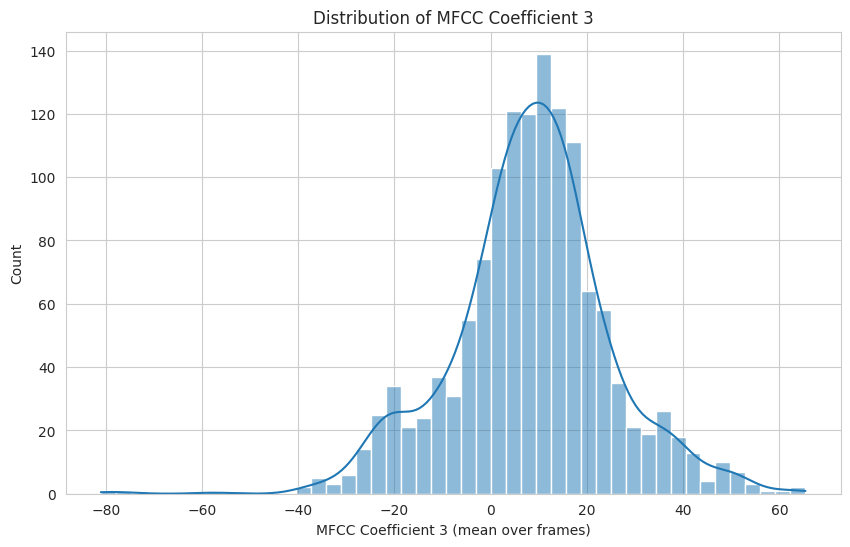

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


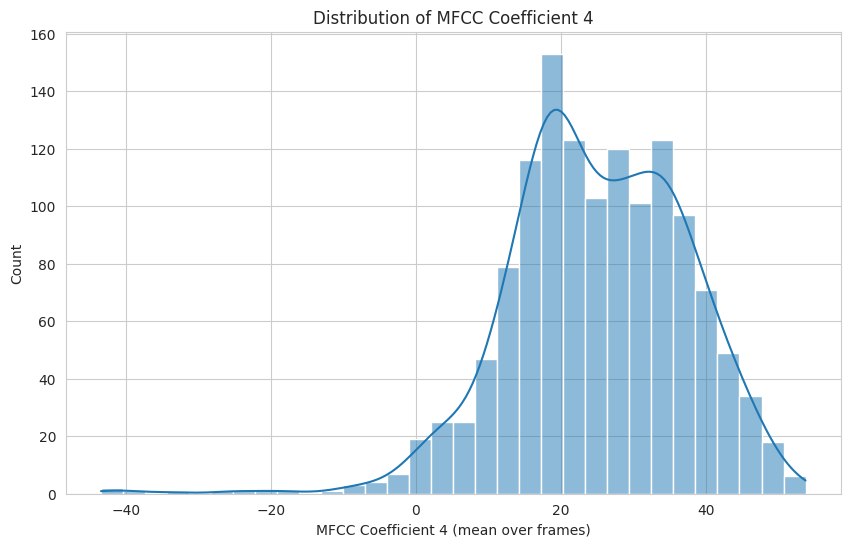

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


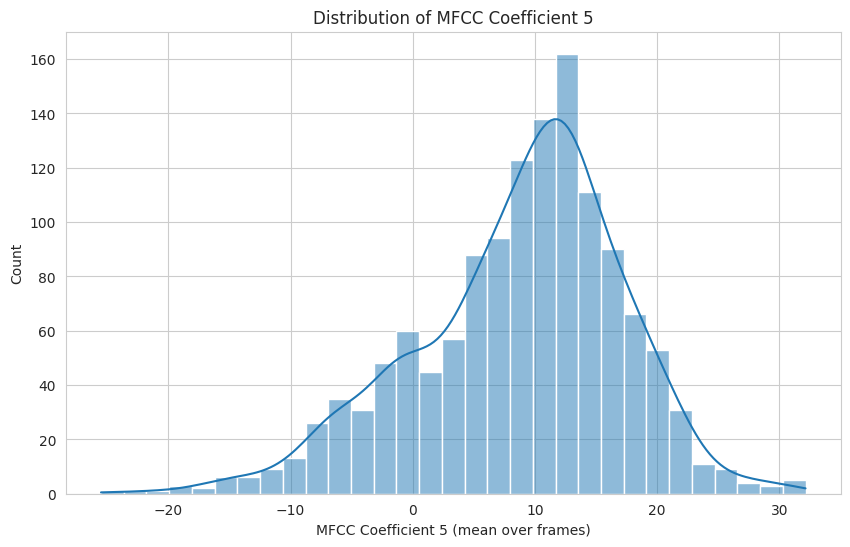

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


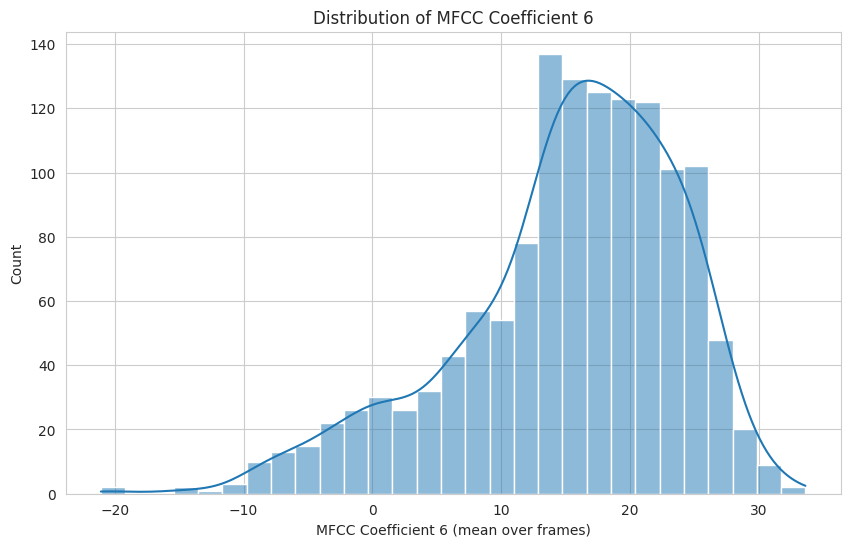

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


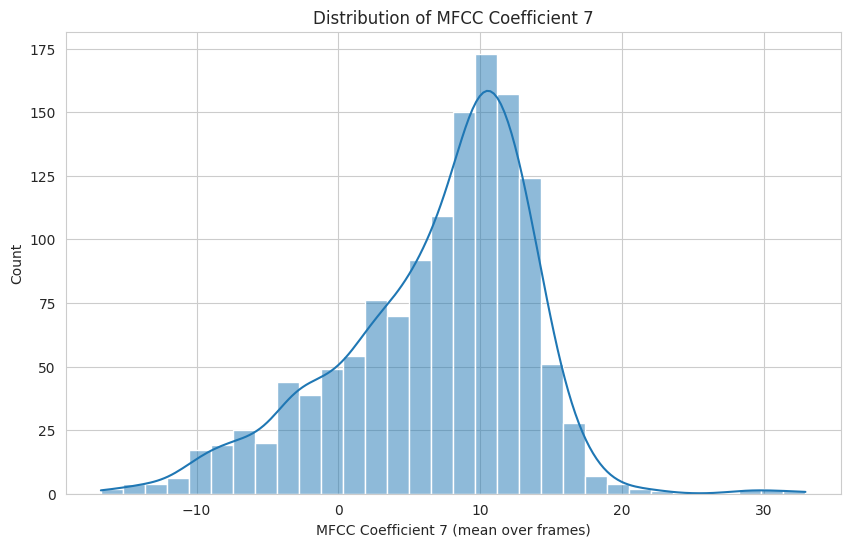

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


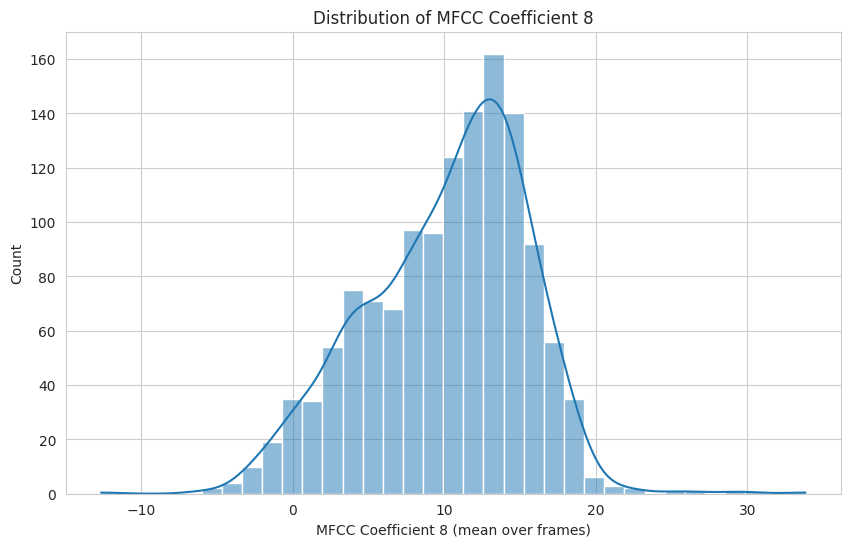

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


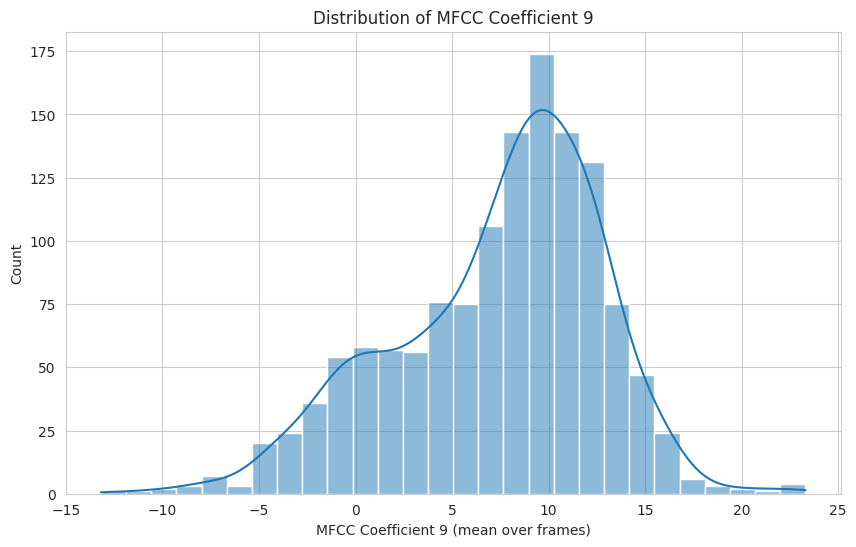

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


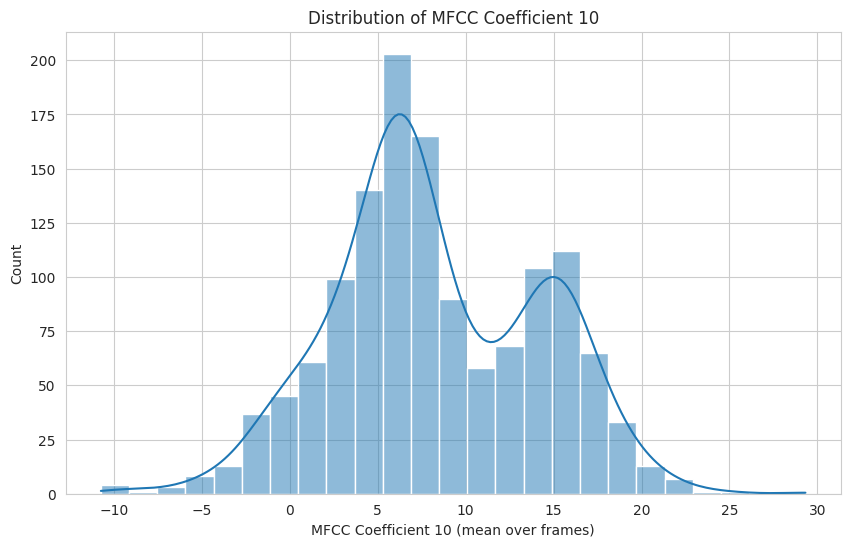

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


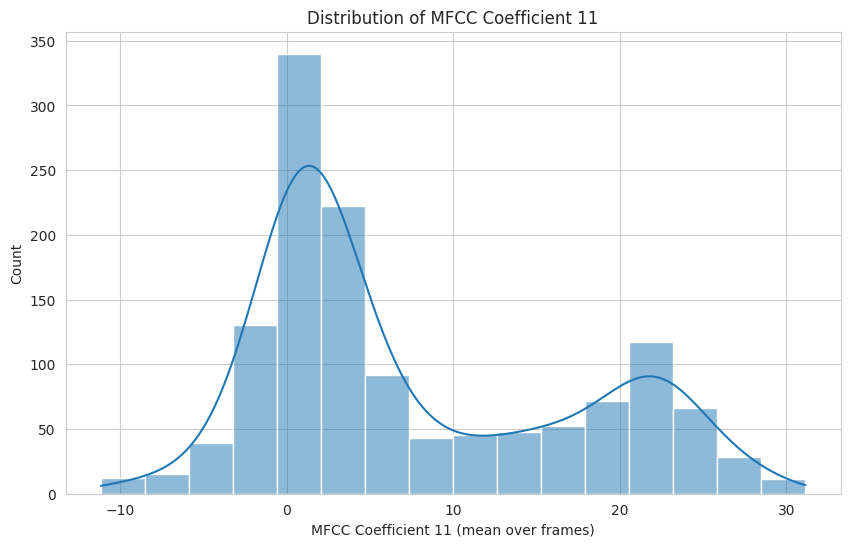

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


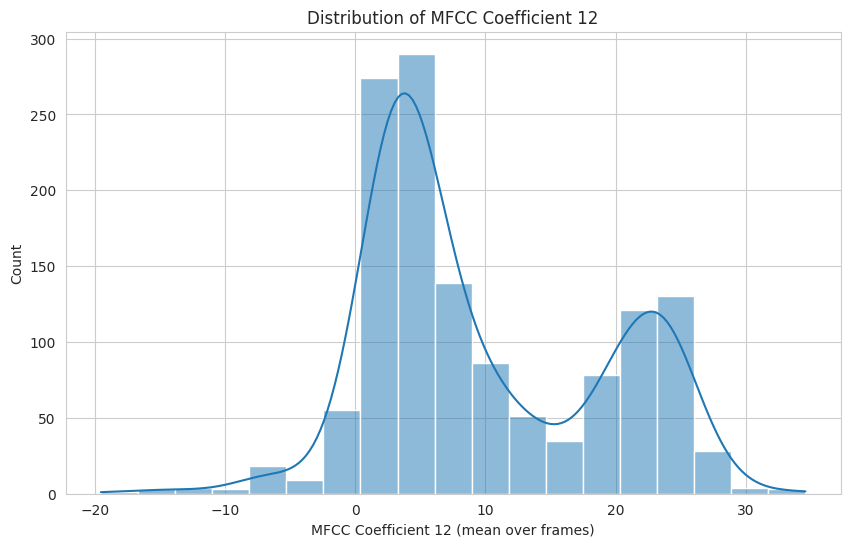

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


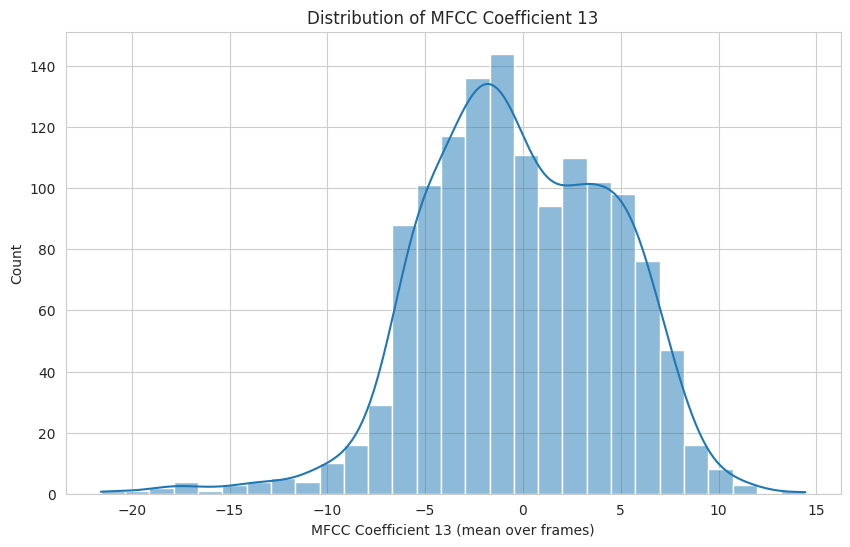

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


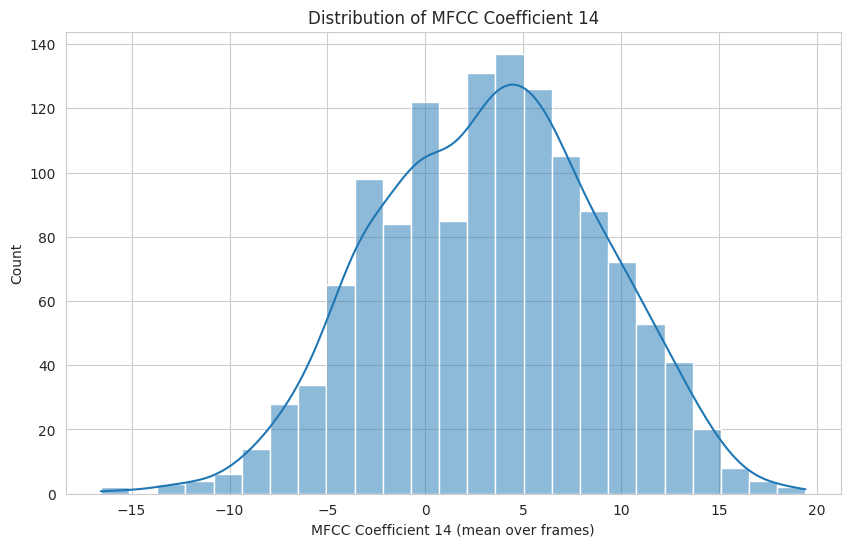

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


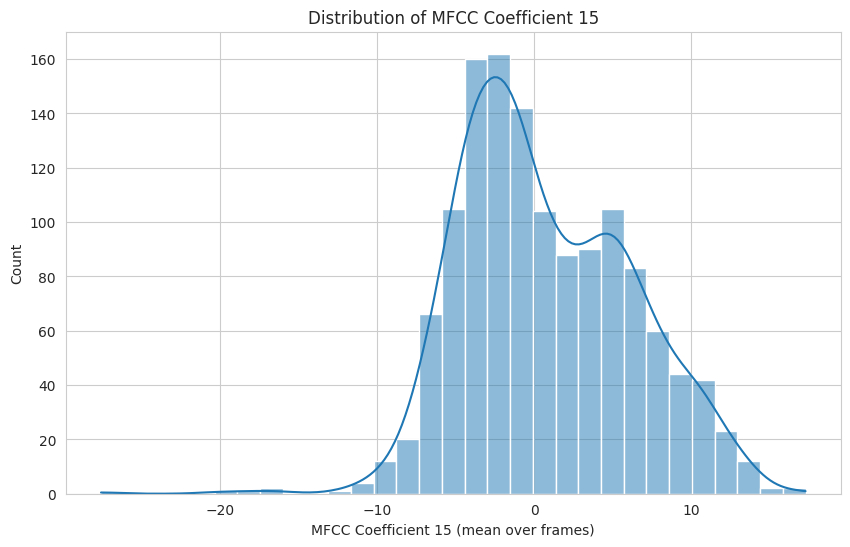

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


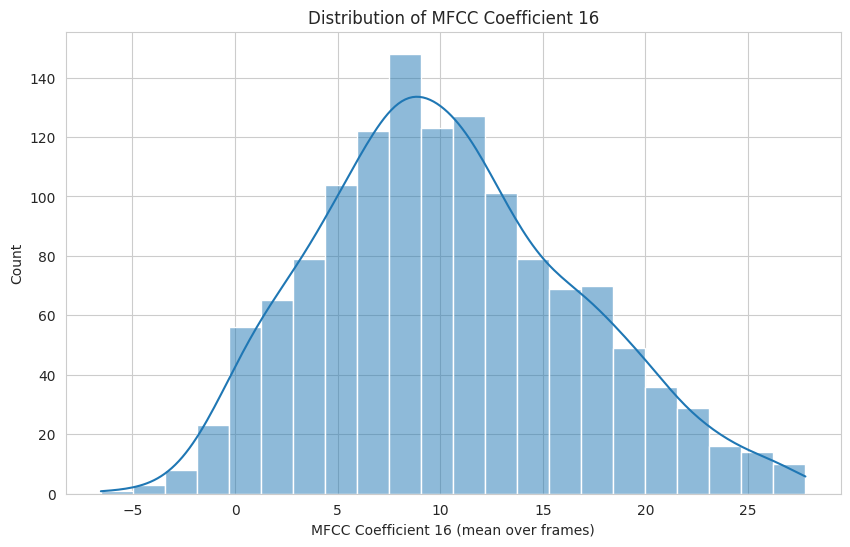

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


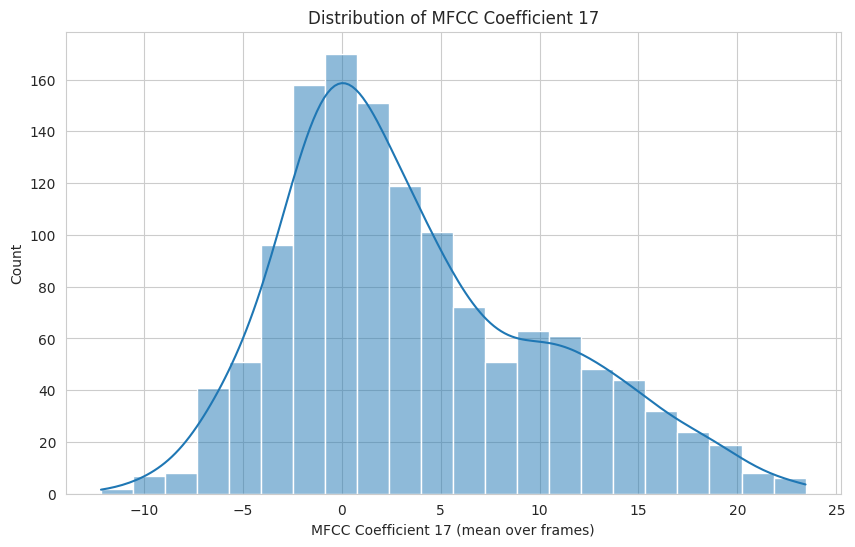

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


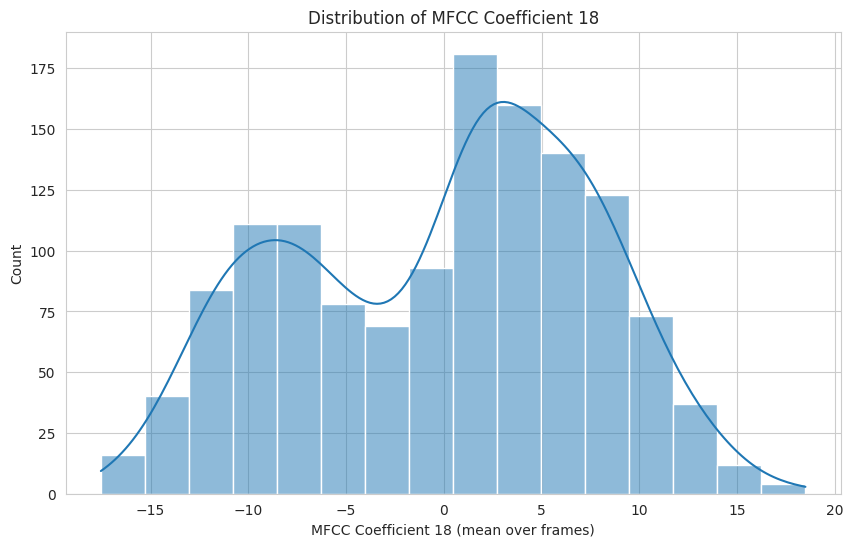

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


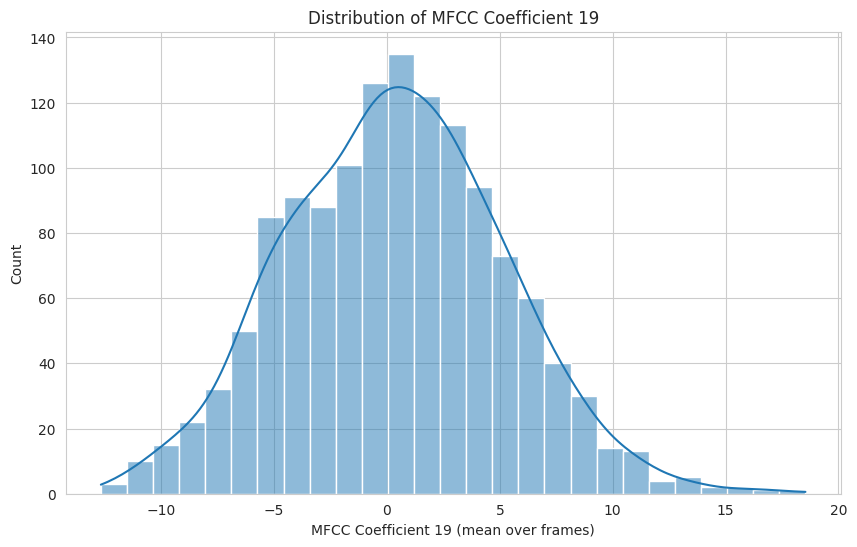

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


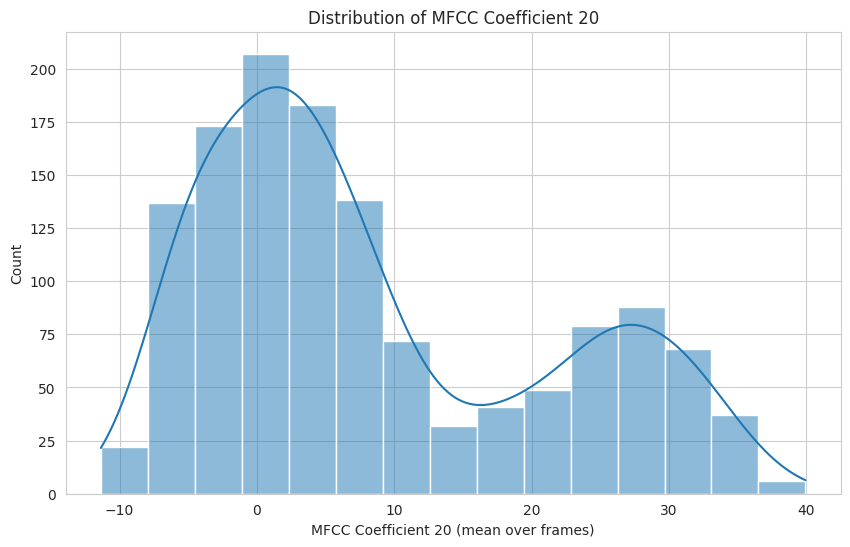

In [22]:
spectral_bandwidths = []
spectral_rolloffs = []
mfccs = []

for file in drone_audio:
    audio, sr = librosa.load(file, sr=None)
    sb = librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0]
    spectral_bandwidths.append(np.mean(sb))

    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
    spectral_rolloffs.append(np.mean(rolloff))

    mfcc = librosa.feature.mfcc(y=audio, sr=sr)
    mfccs.append(np.mean(mfcc, axis=1))

def plot_feature_distribution(feature_values, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(feature_values, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()
    
plot_feature_distribution(spectral_bandwidths, 'Distribution of Spectral Bandwidths', 'Spectral Bandwidth (mean over frames)')

plot_feature_distribution(spectral_rolloffs, 'Distribution of Spectral Rolloffs', 'Spectral Rolloff (mean over frames)')


num_mfccs = len(mfccs[0])

for i in range(num_mfccs):
    mfcc_coeff = [mfcc[i] for mfcc in mfccs]
    plot_feature_distribution(mfcc_coeff, f'Distribution of MFCC Coefficient {i+1}', f'MFCC Coefficient {i+1} (mean over frames)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


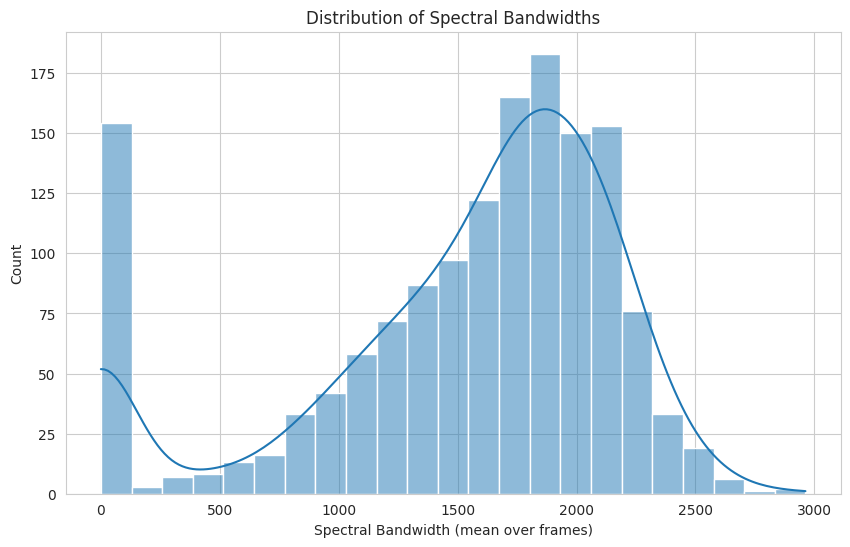

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


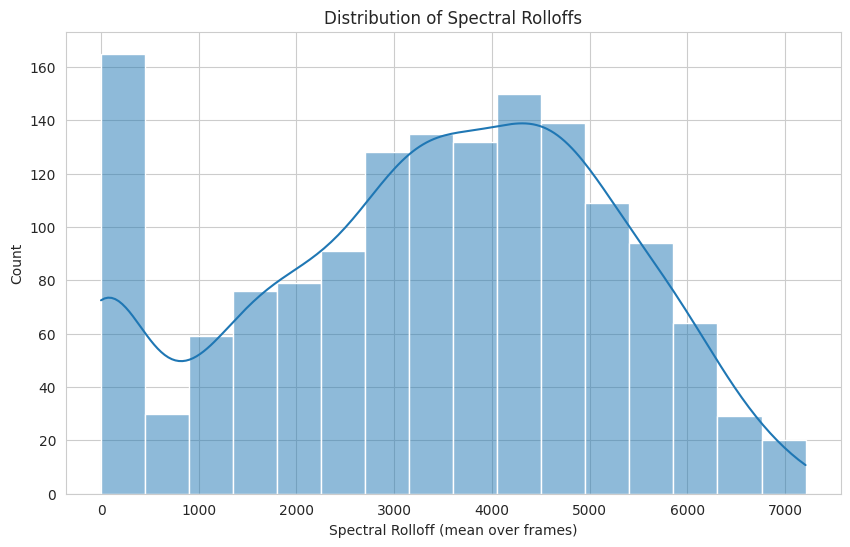

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


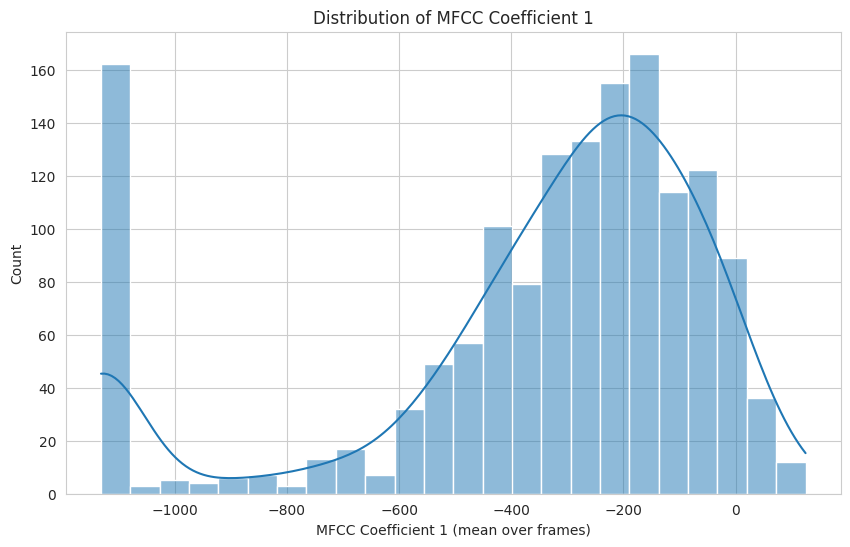

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


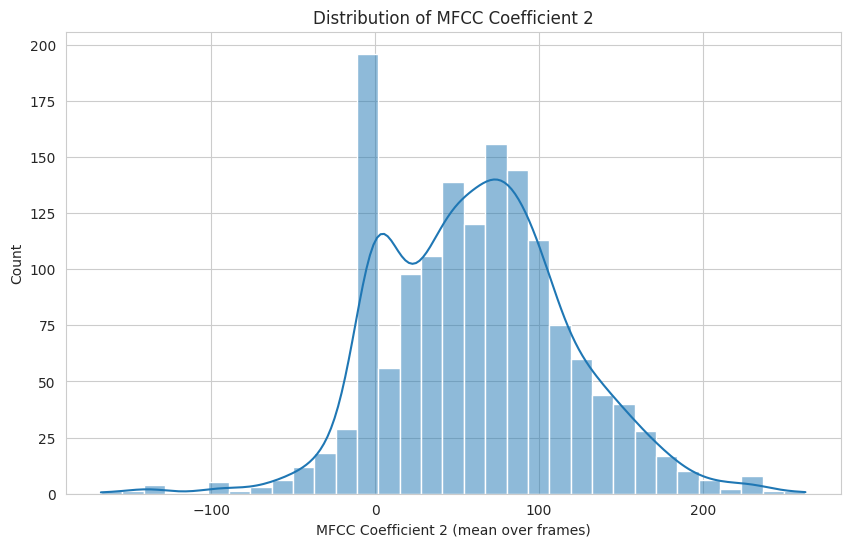

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


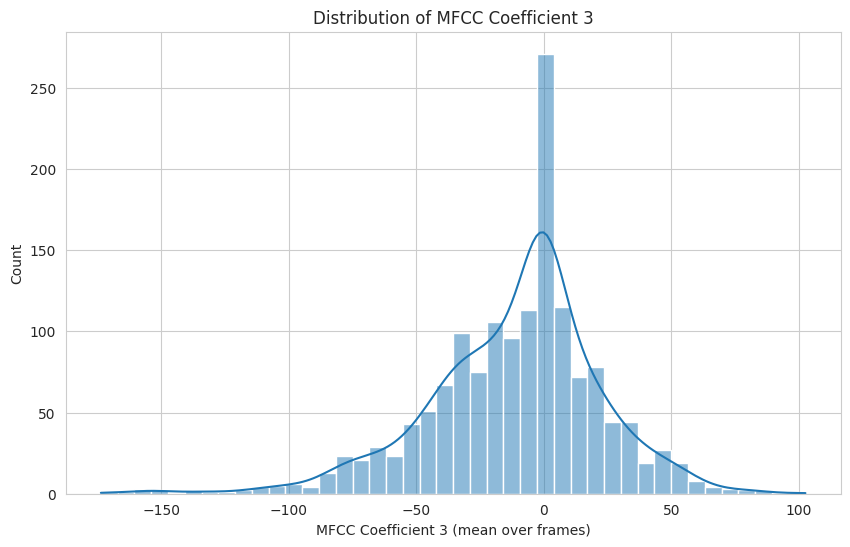

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


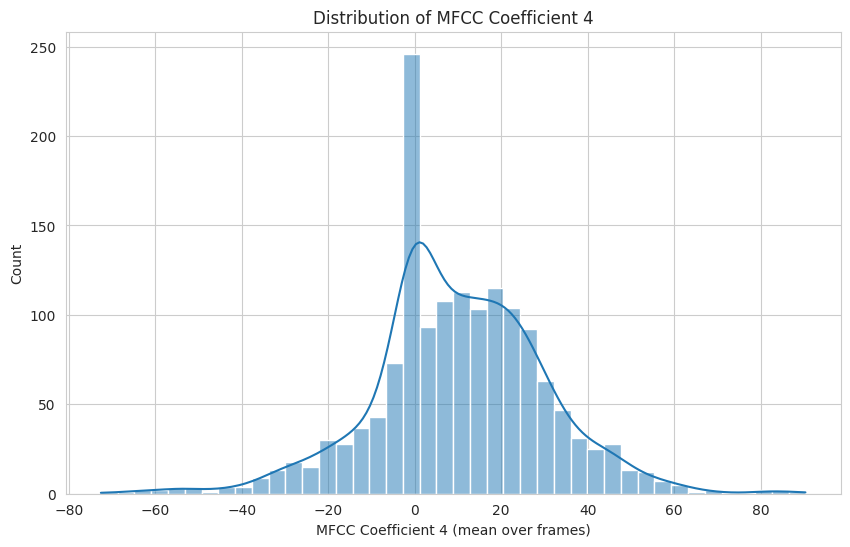

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


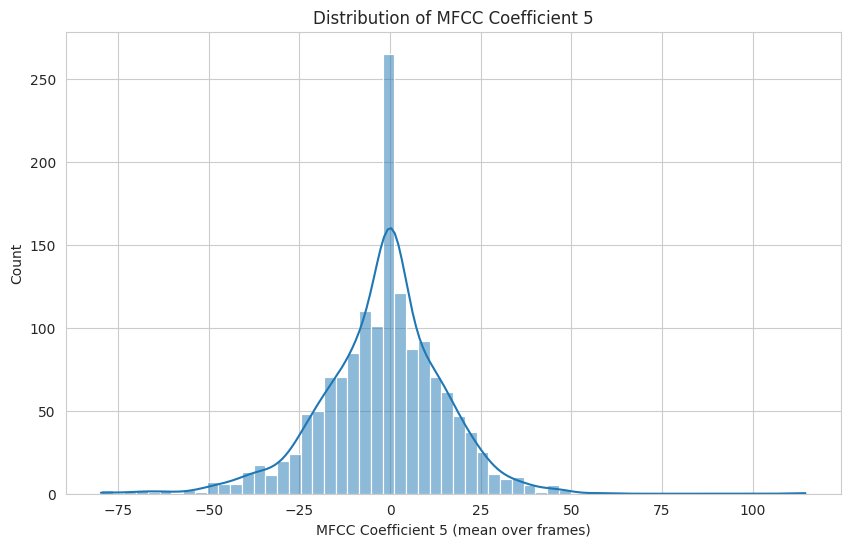

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


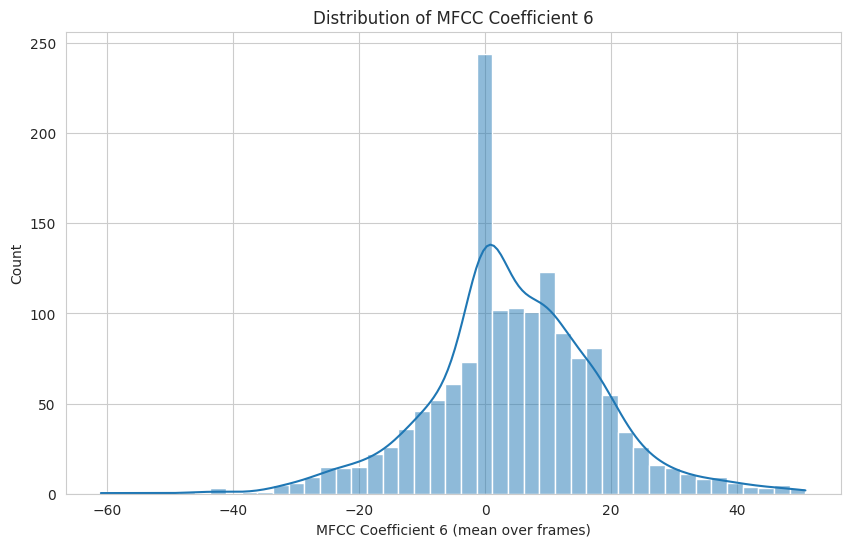

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


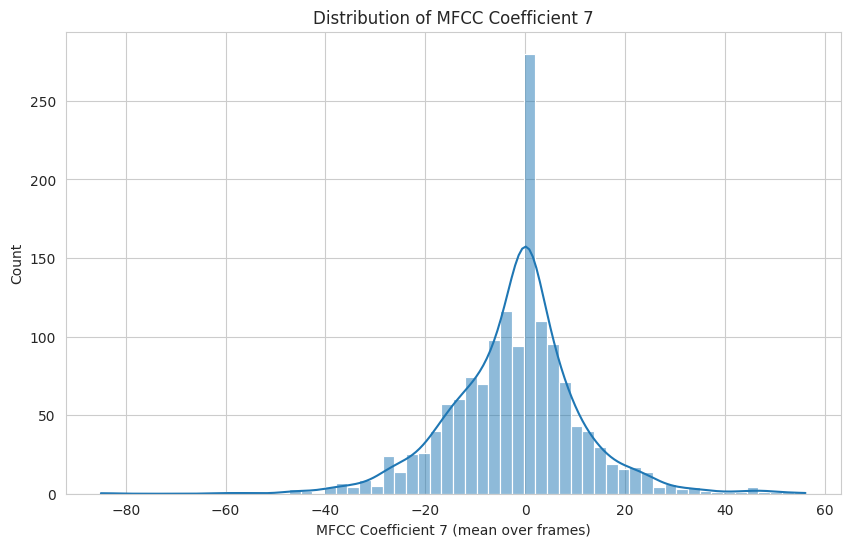

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


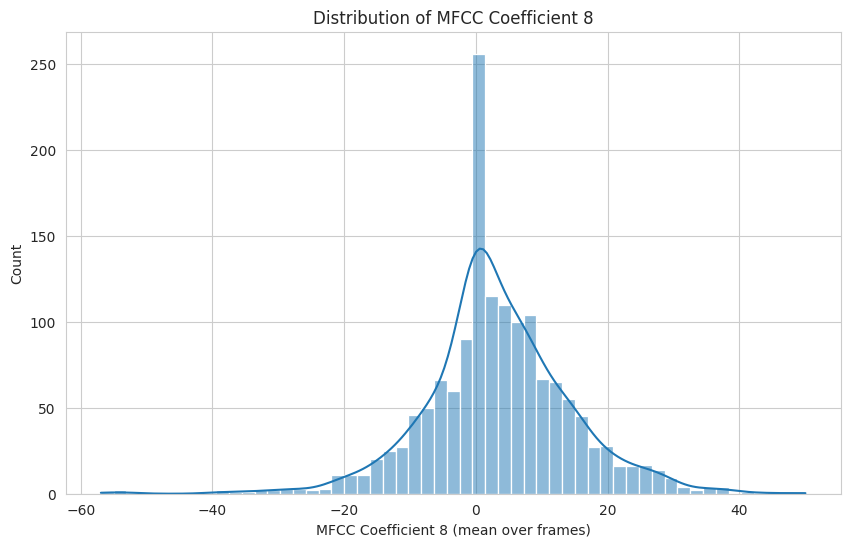

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


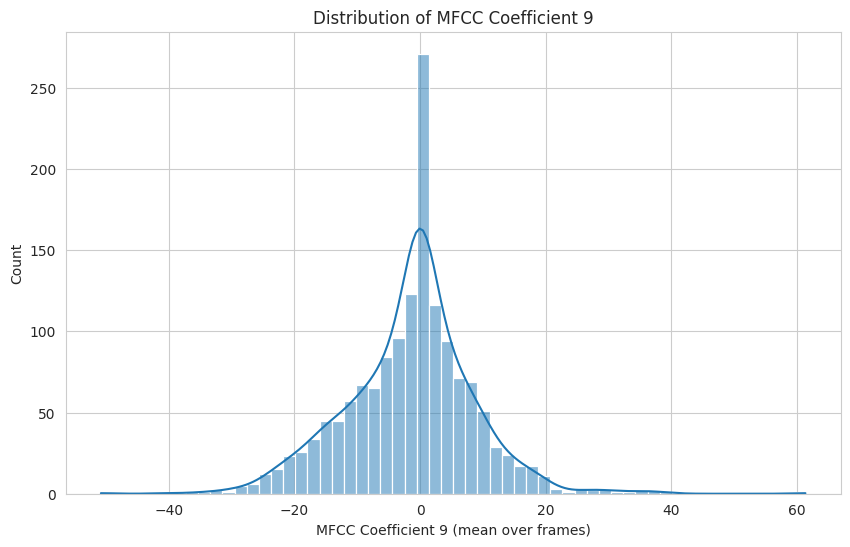

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


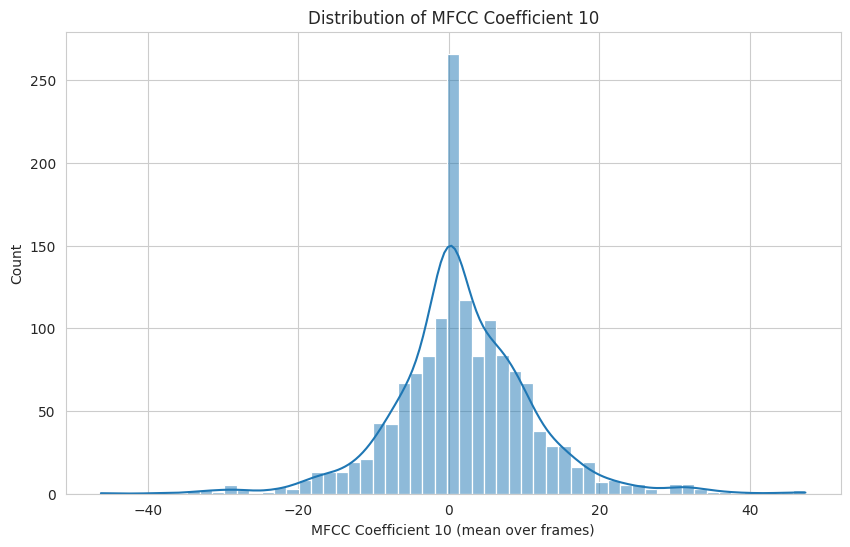

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


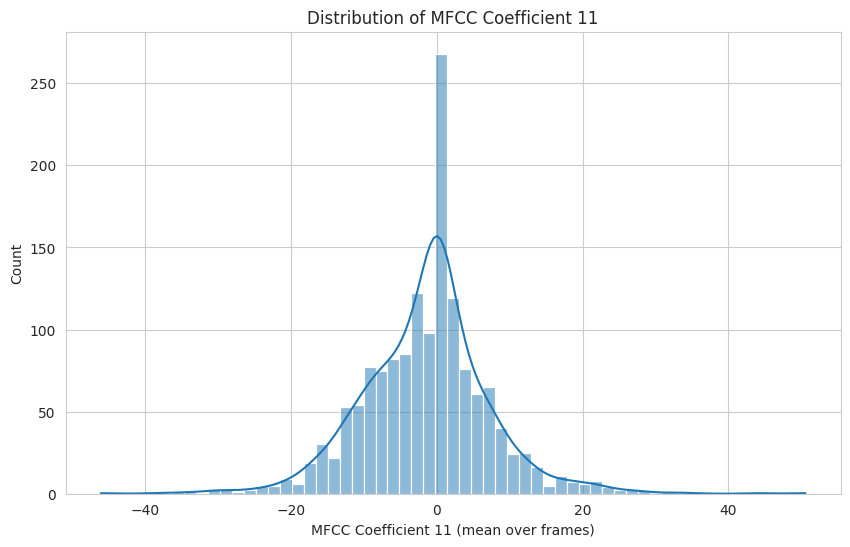

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


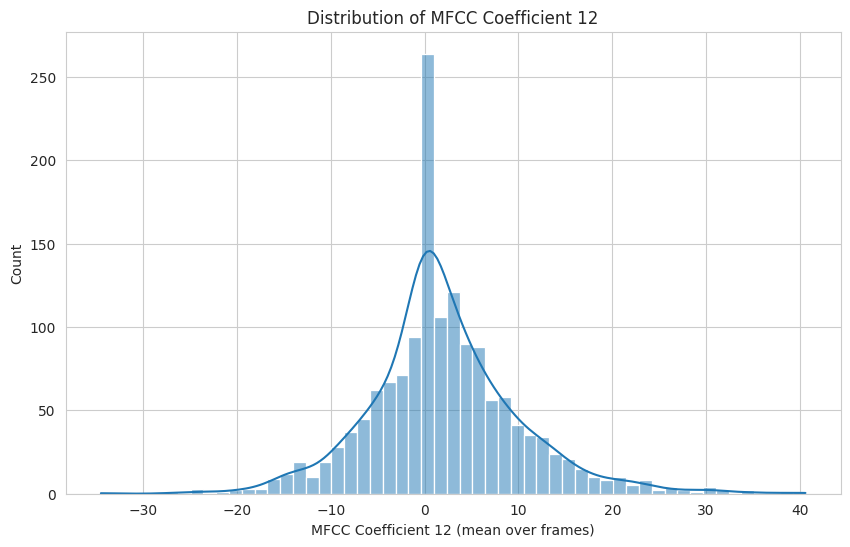

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


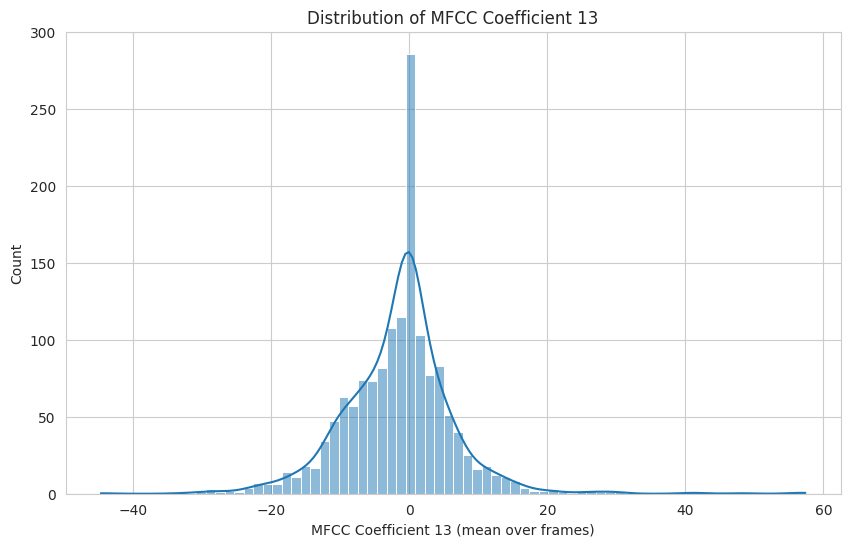

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


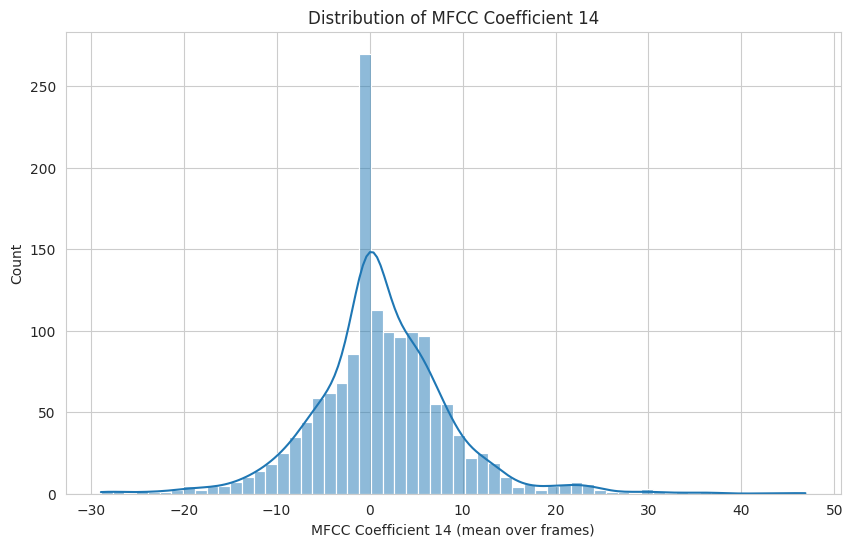

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


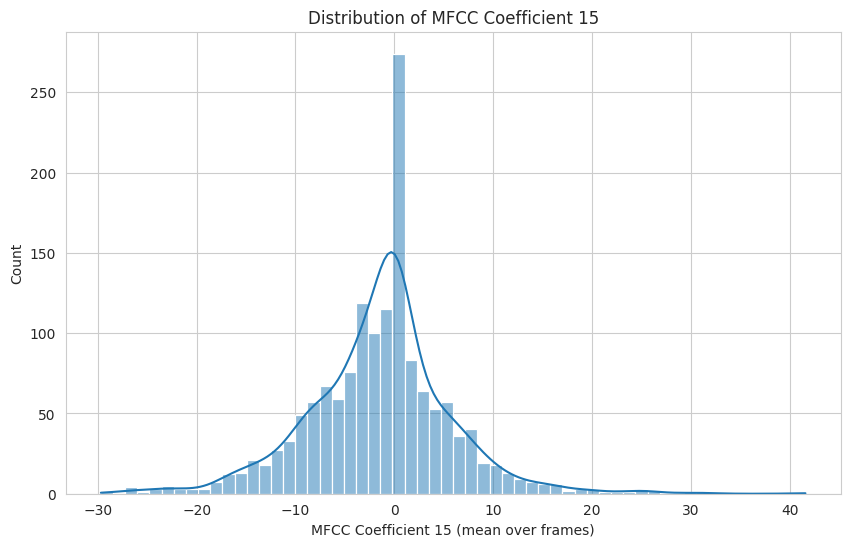

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


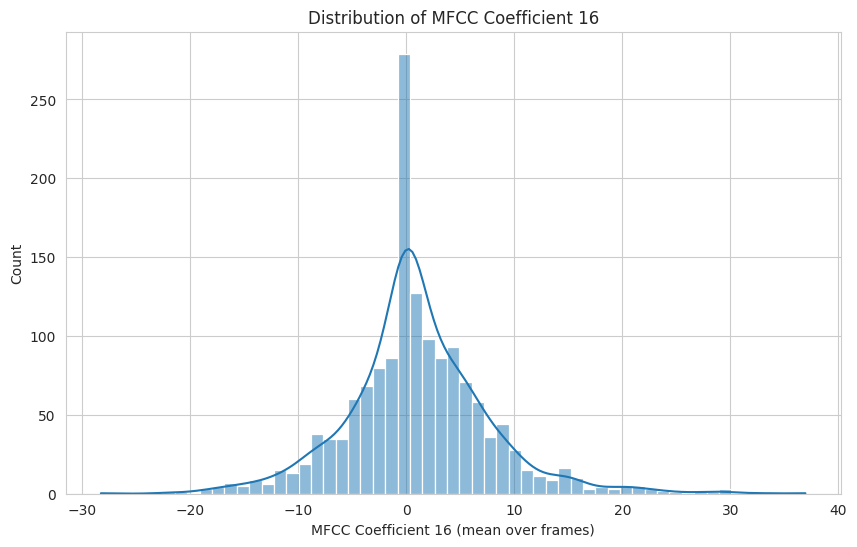

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


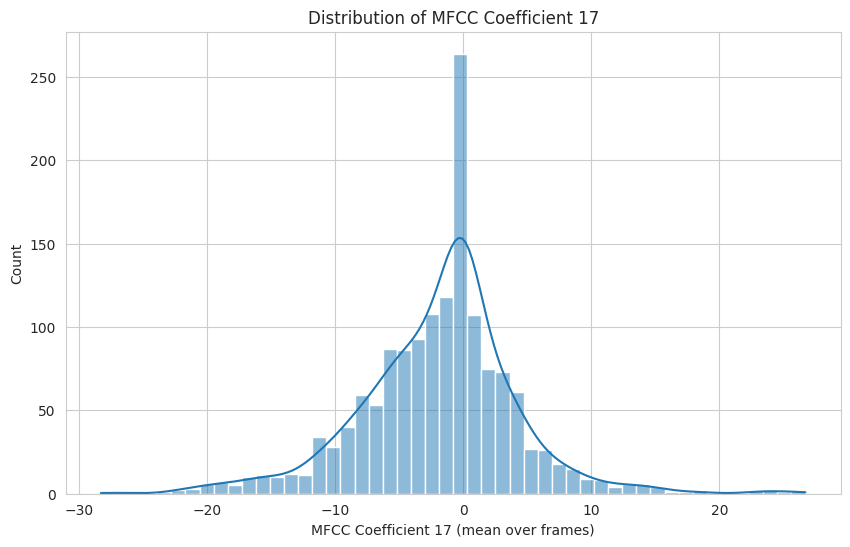

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


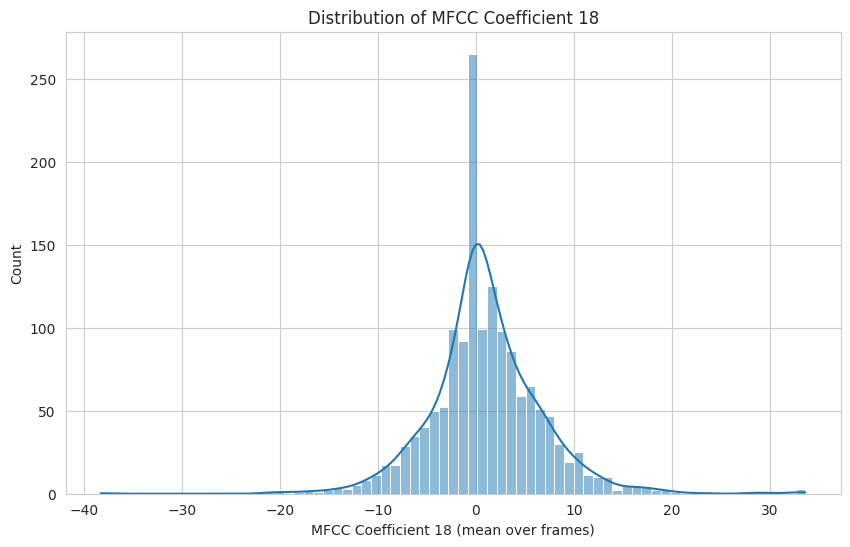

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


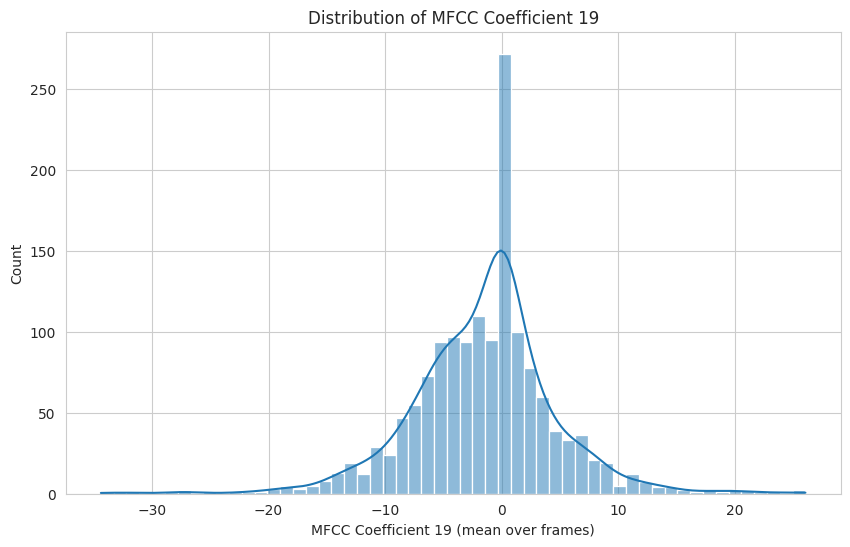

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


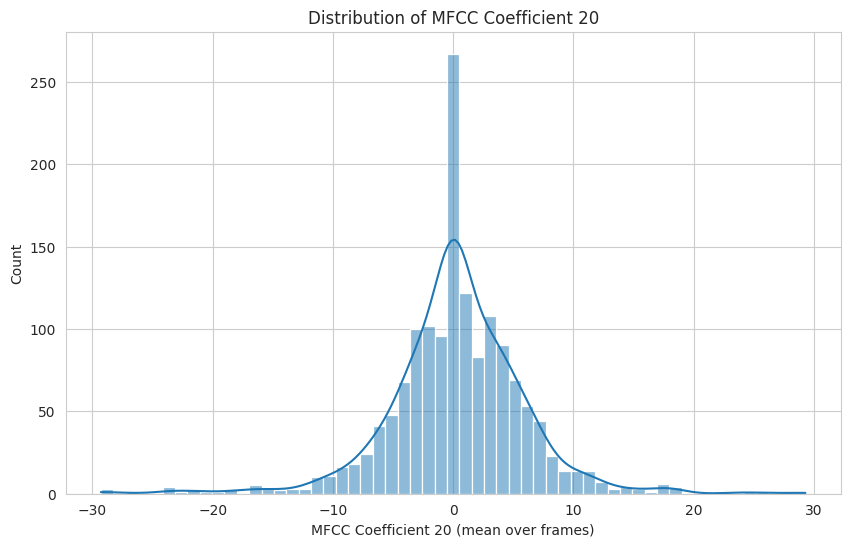

In [23]:
spectral_bandwidths2 = []
spectral_rolloffs2 = []
mfccs2 = []

for file in unknown_audio:
    audio, sr = librosa.load(file, sr=None)
    sb = librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0]
    spectral_bandwidths2.append(np.mean(sb))

    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
    spectral_rolloffs2.append(np.mean(rolloff))

    mfcc = librosa.feature.mfcc(y=audio, sr=sr)
    mfccs2.append(np.mean(mfcc, axis=1))

plot_feature_distribution(spectral_bandwidths2, 'Distribution of Spectral Bandwidths', 'Spectral Bandwidth (mean over frames)')

plot_feature_distribution(spectral_rolloffs2, 'Distribution of Spectral Rolloffs', 'Spectral Rolloff (mean over frames)')


num_mfccs = len(mfccs2[0])

for i in range(0,20):
    mfcc_coeff = [mfcc[i] for mfcc in mfccs2]
    plot_feature_distribution(mfcc_coeff, f'Distribution of MFCC Coefficient {i+1}', f'MFCC Coefficient {i+1} (mean over frames)')

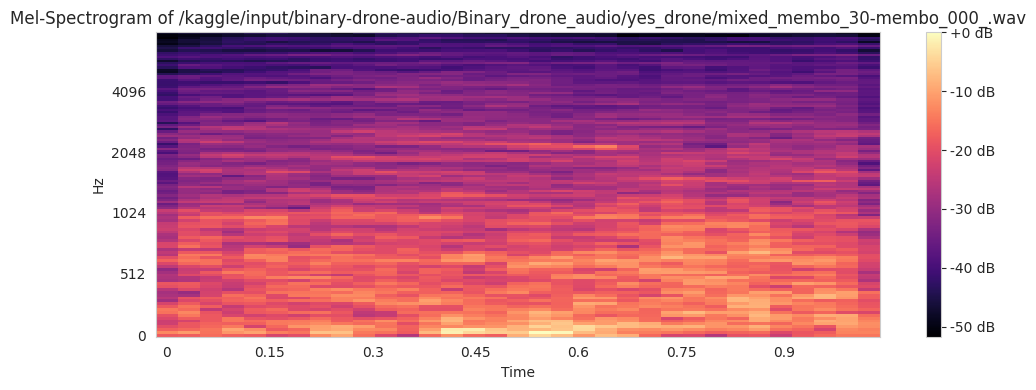

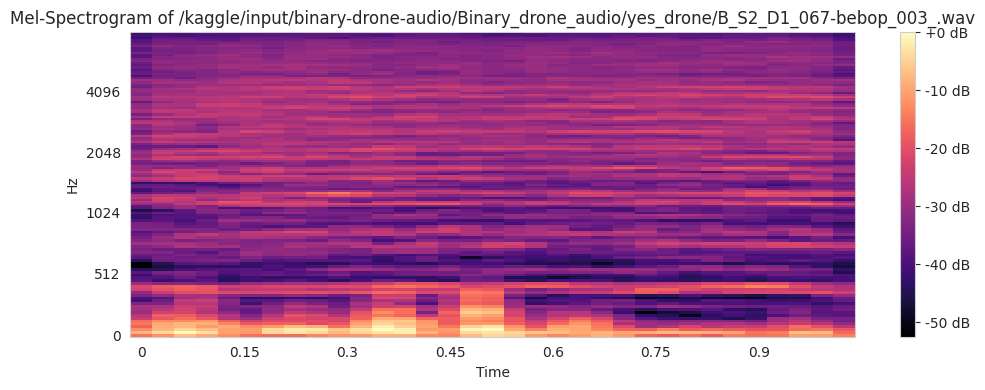

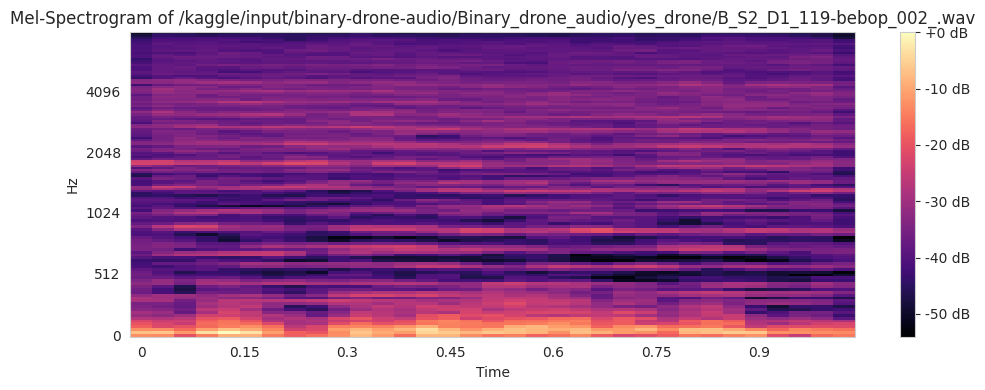

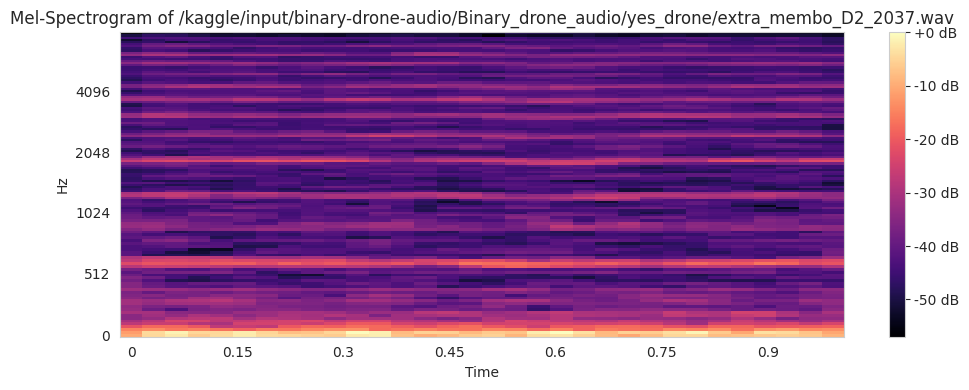

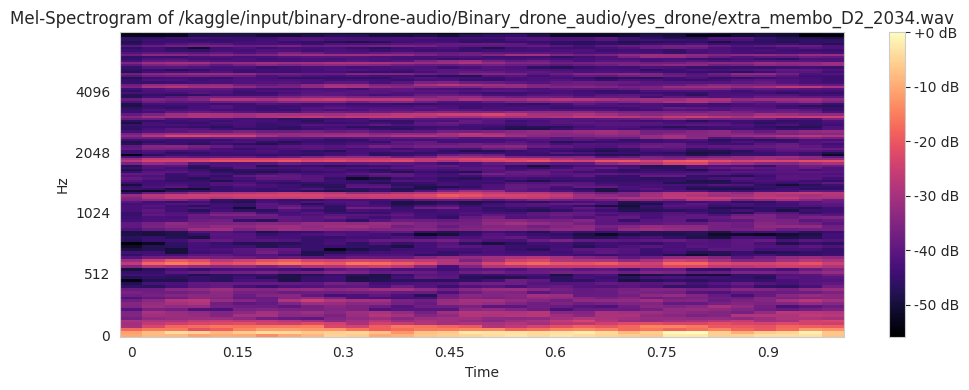

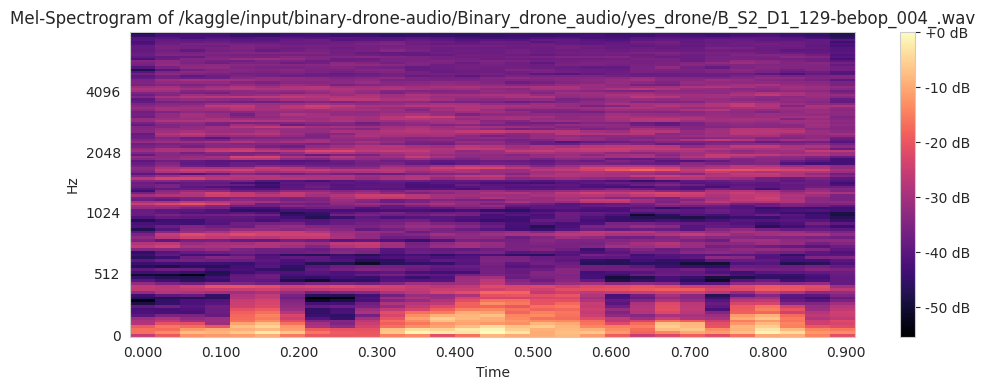

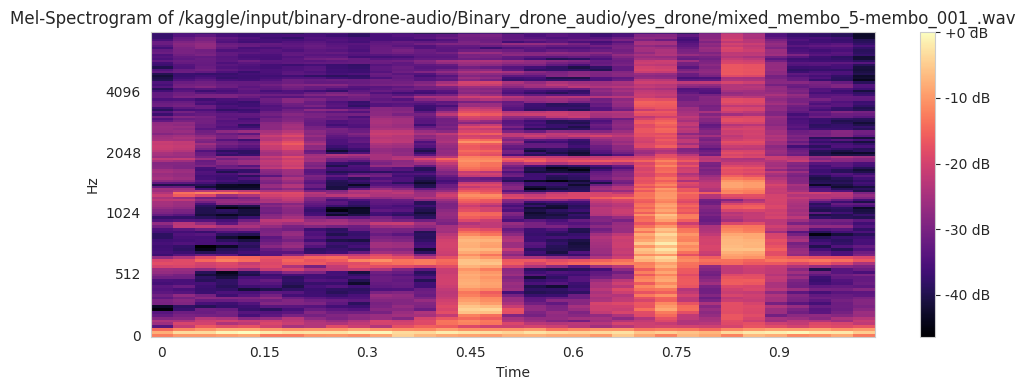

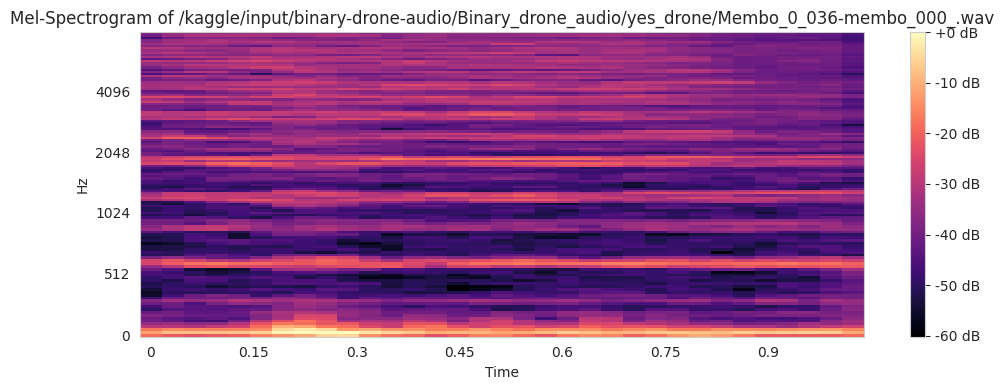

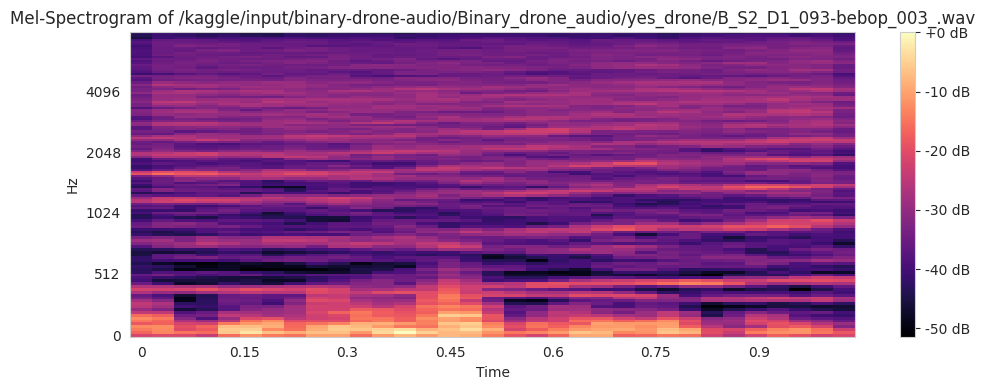

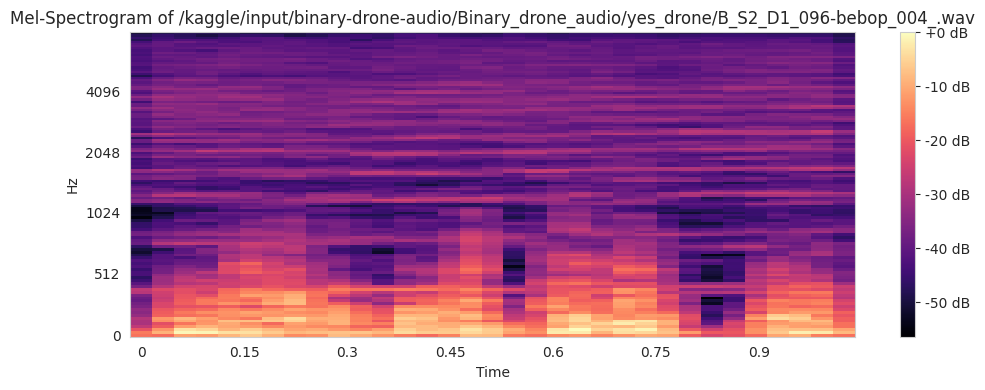

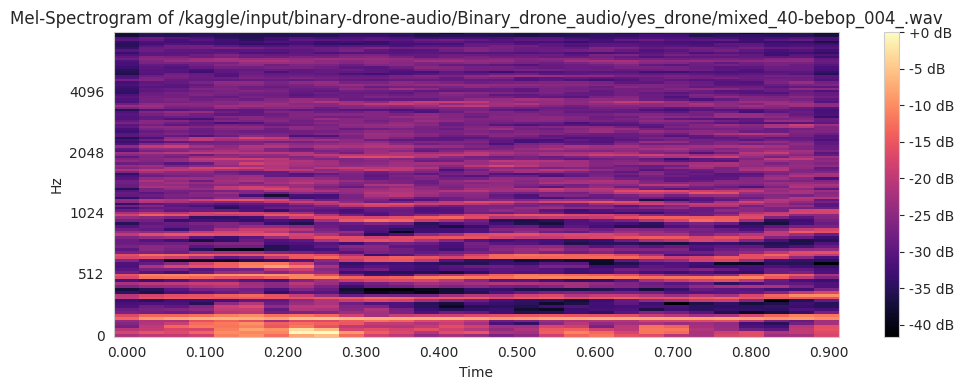

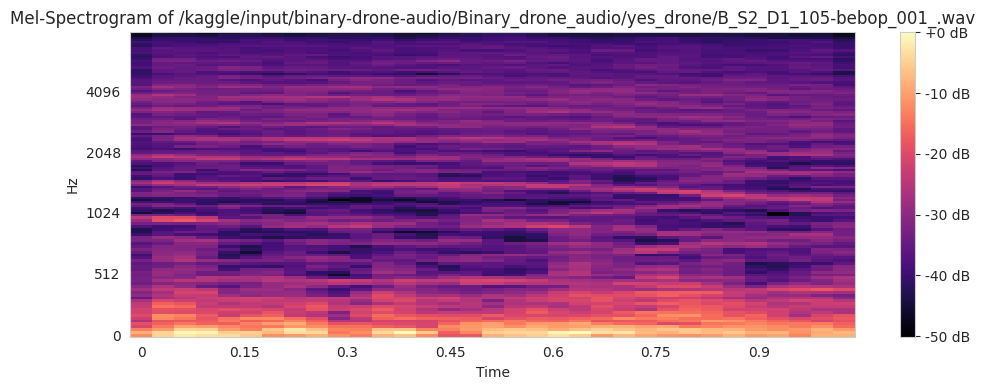

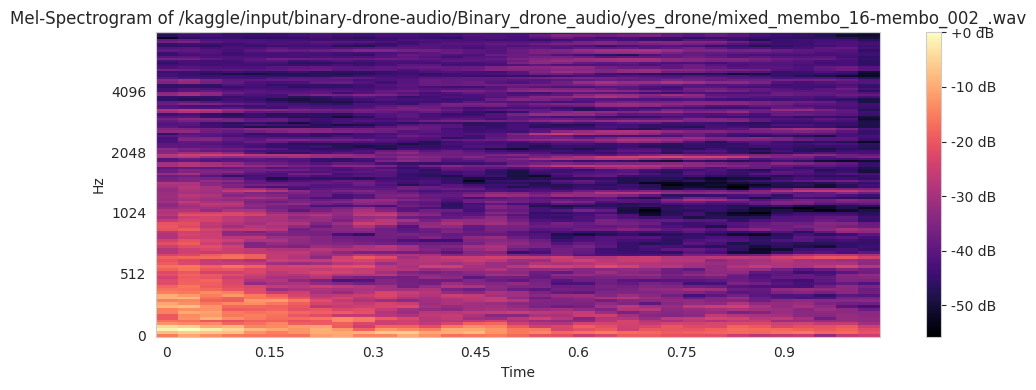

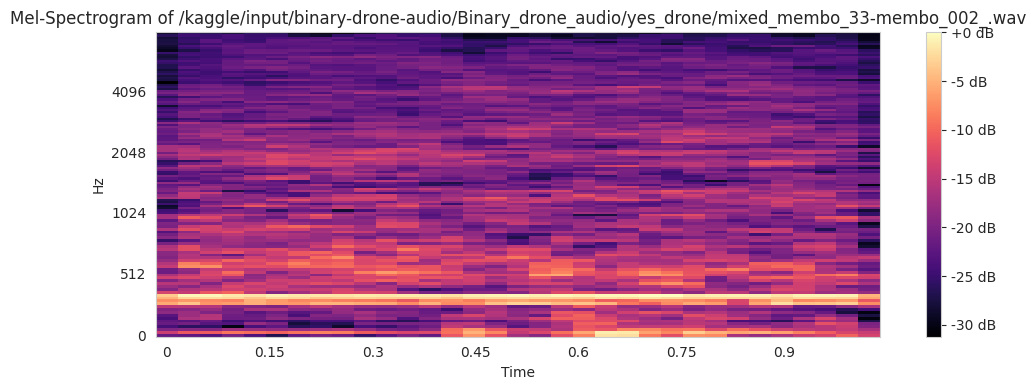

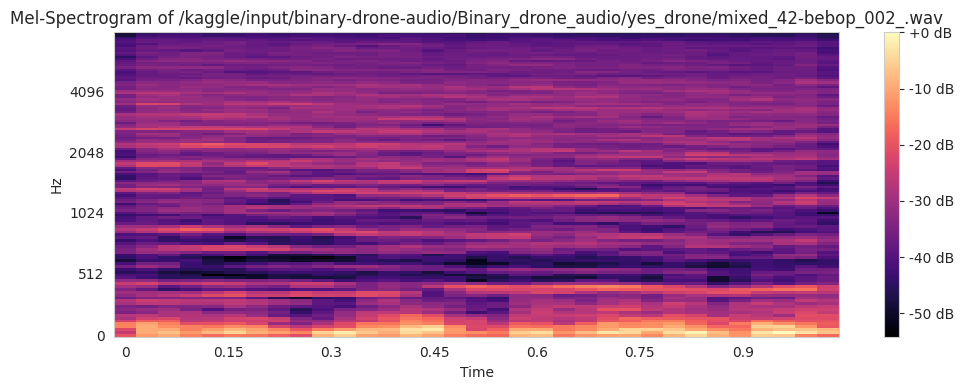

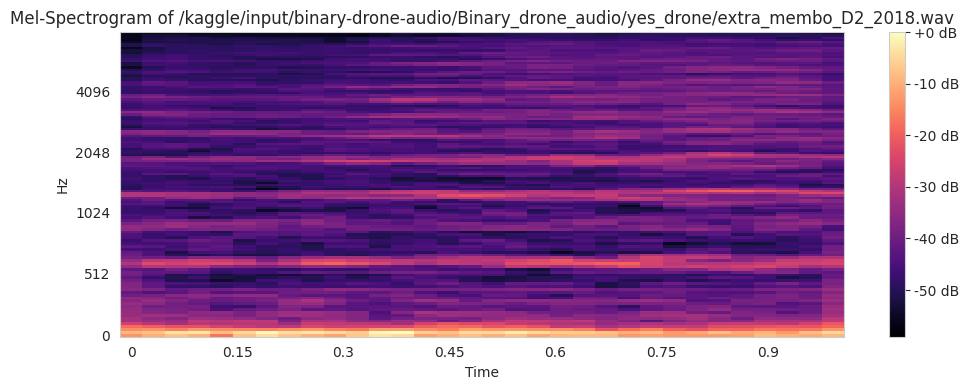

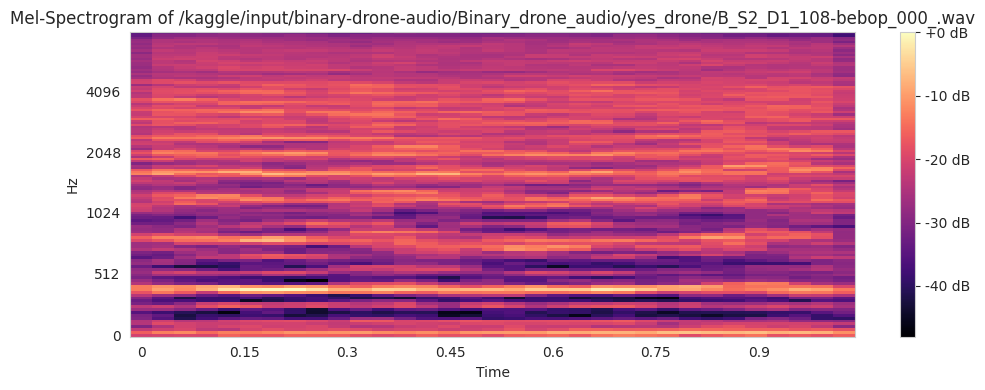

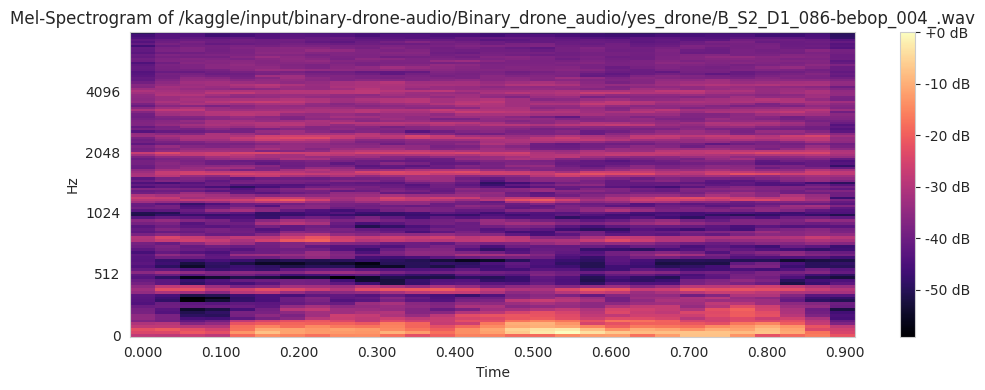

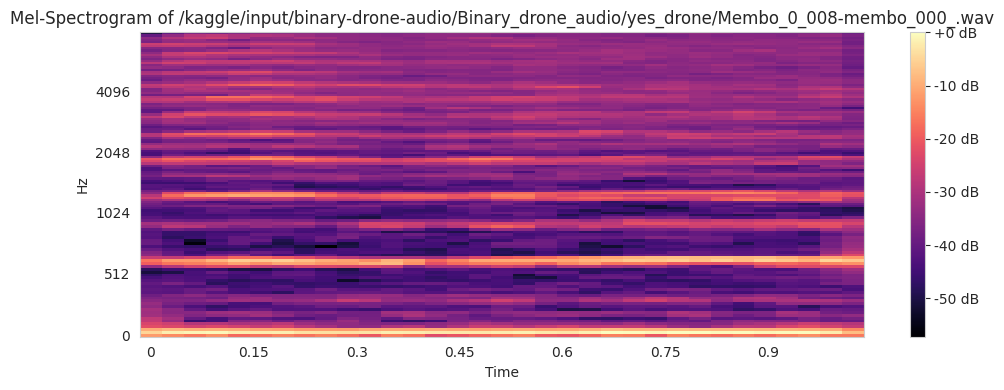

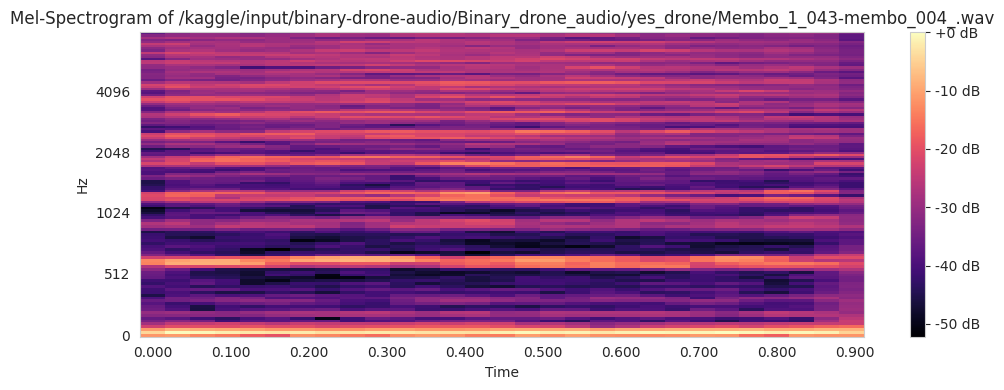

In [24]:
import random

sampled_files = random.sample(drone_audio, 20)

for file_path in sampled_files:
    audio, sr = librosa.load(file_path, sr=None)

    mel_spectrogram = librosa.feature.melspectrogram(y= audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    S_db_mel = librosa.power_to_db(mel_spectrogram, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db_mel, sr=sr, hop_length=512, x_axis="time", y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram of {file_path}')
    plt.tight_layout()
    plt.show()

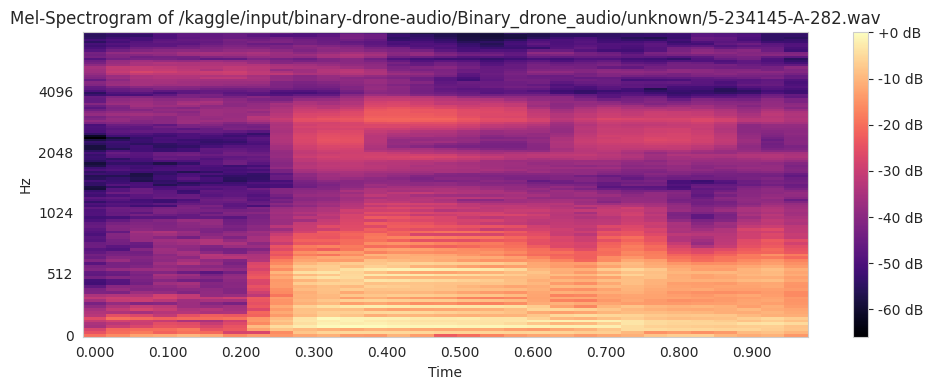

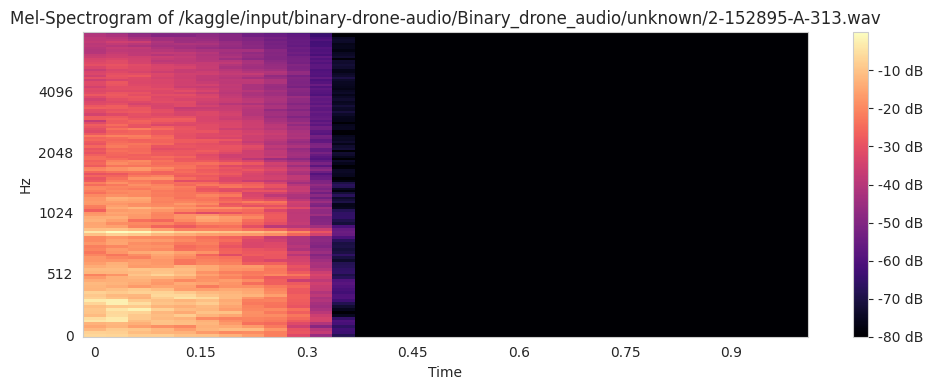

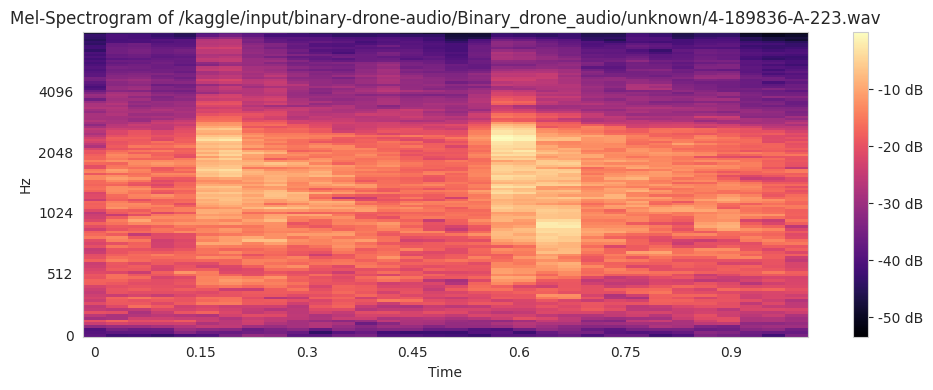

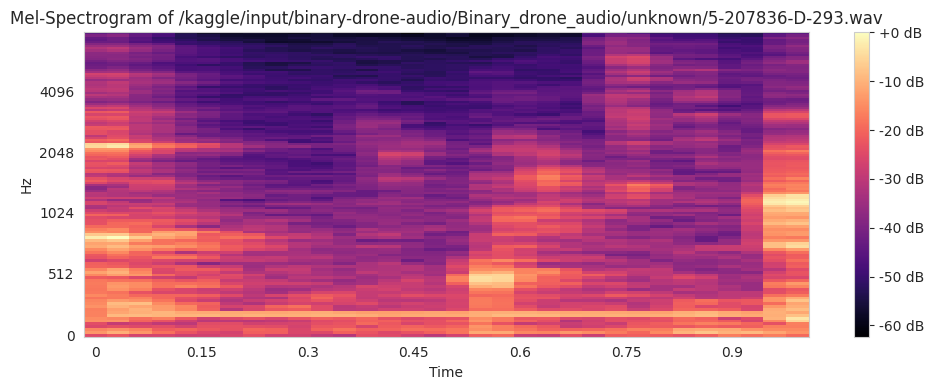

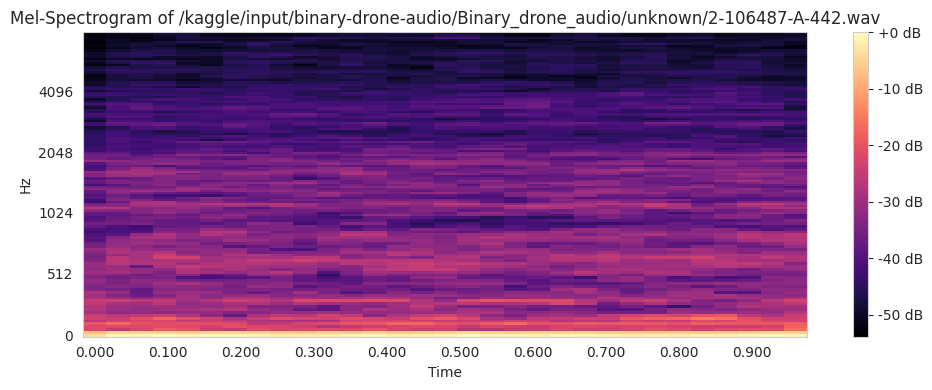

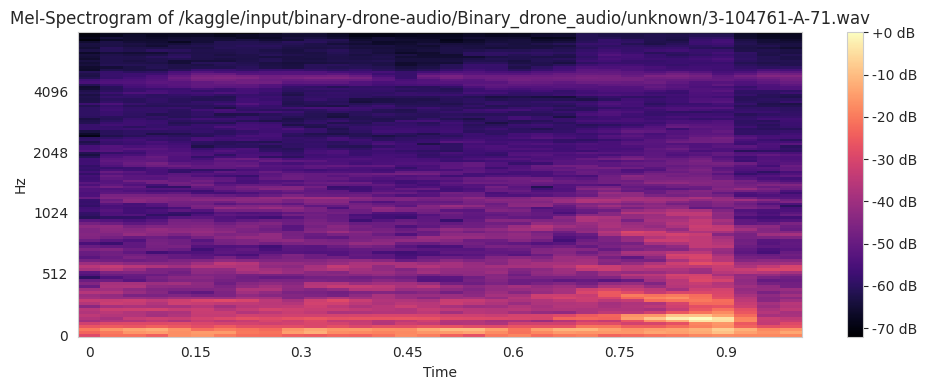

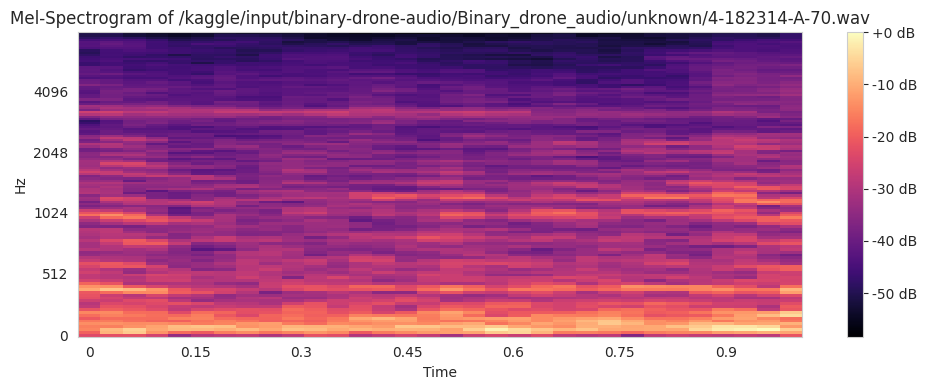

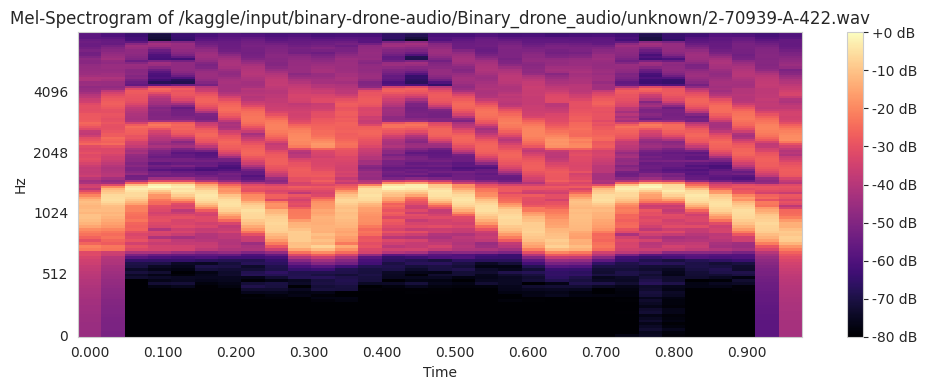

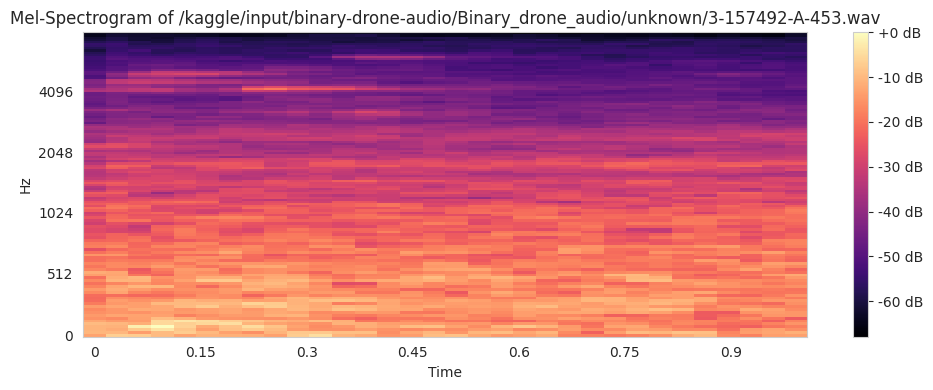

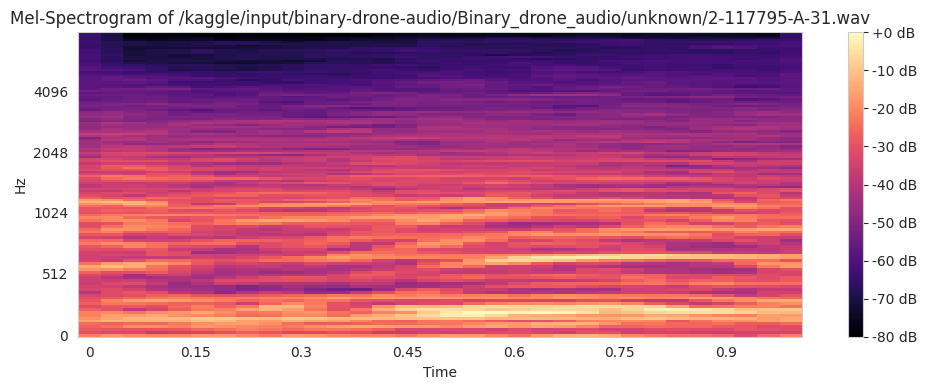

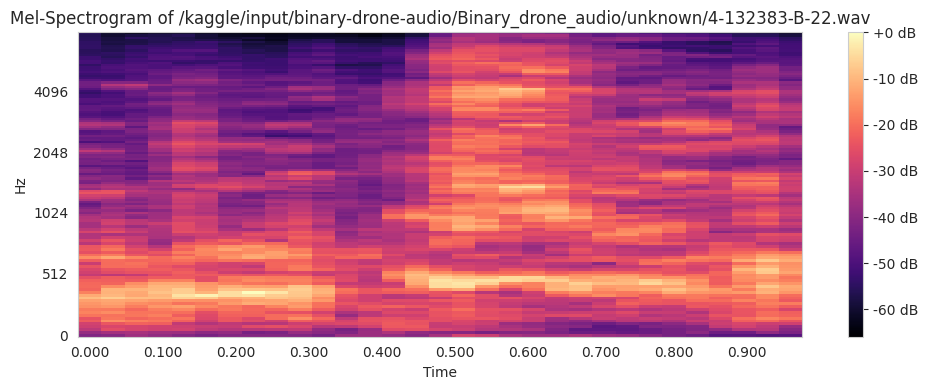

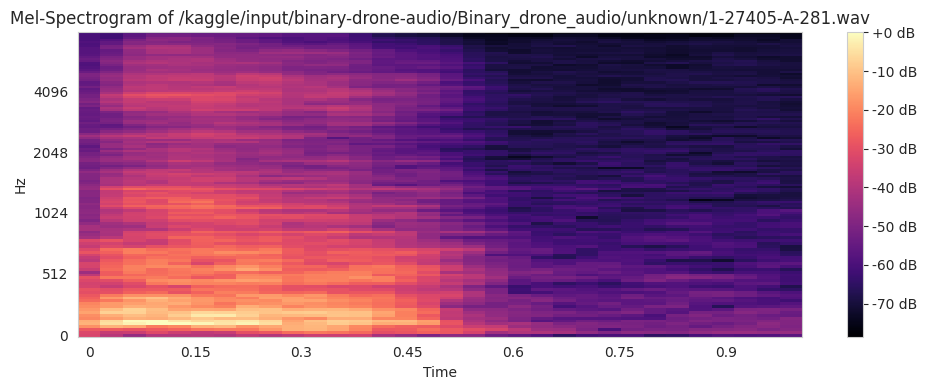

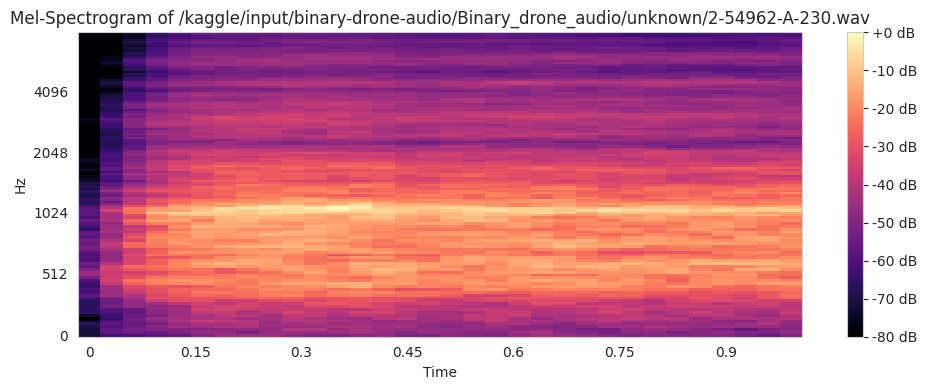

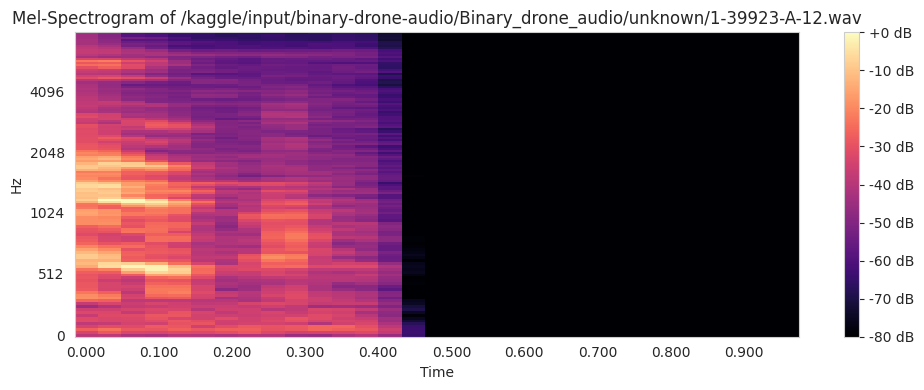

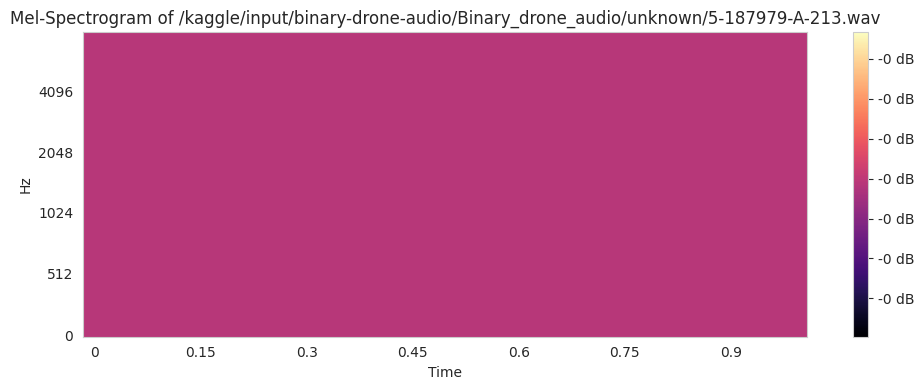

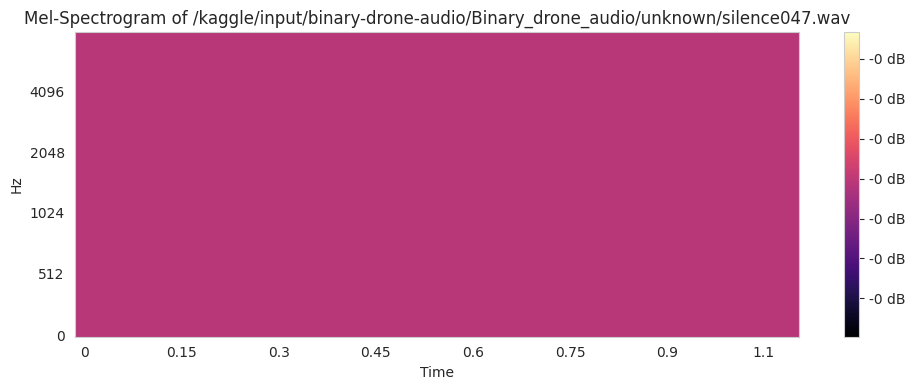

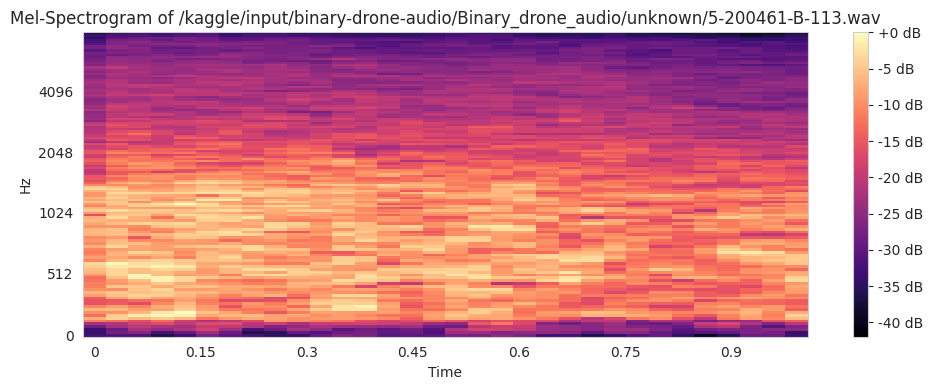

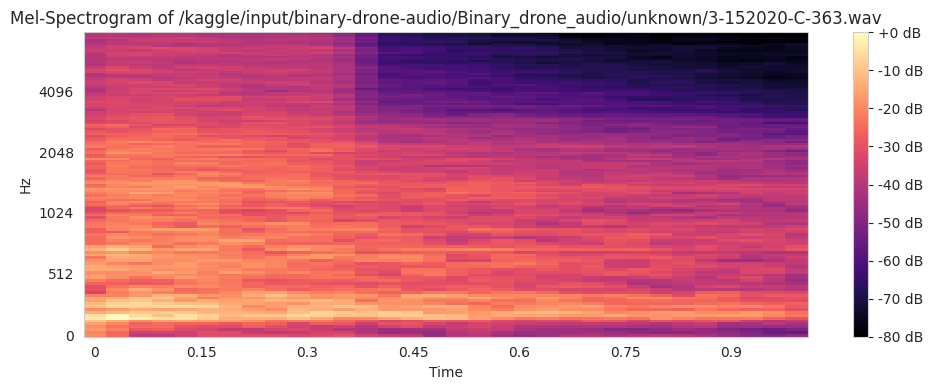

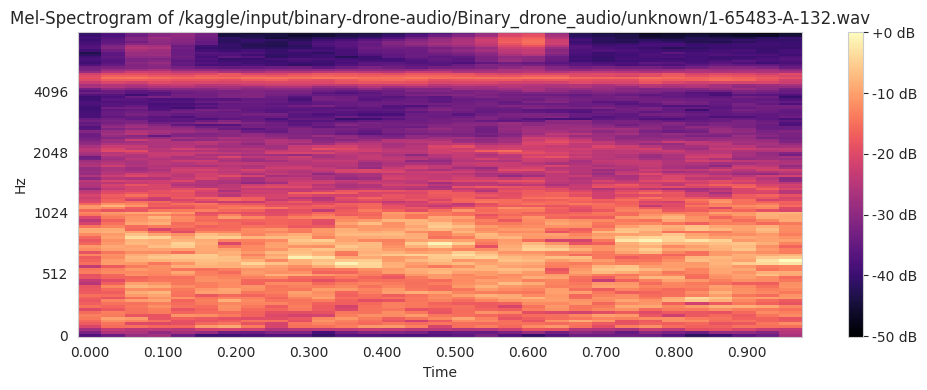

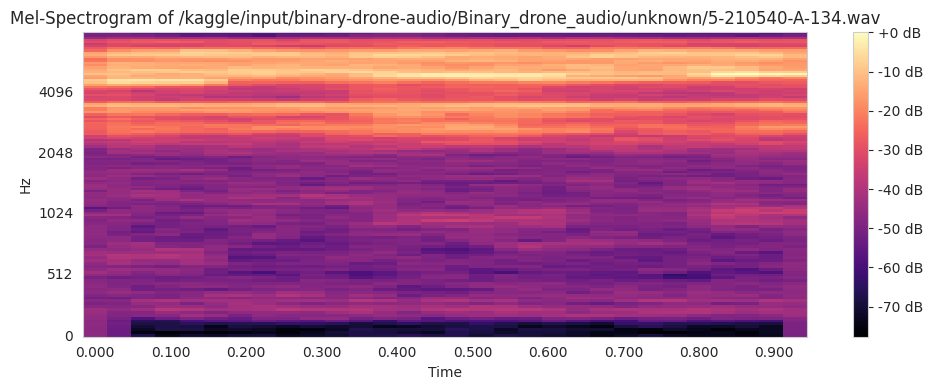

In [25]:
import random

sampled_files = random.sample(unknown_audio, 20)

for file_path in sampled_files:
    audio, sr = librosa.load(file_path, sr=None)

    mel_spectrogram = librosa.feature.melspectrogram(y= audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    S_db_mel = librosa.power_to_db(mel_spectrogram, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db_mel, sr=sr, hop_length=512, x_axis="time", y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram of {file_path}')
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

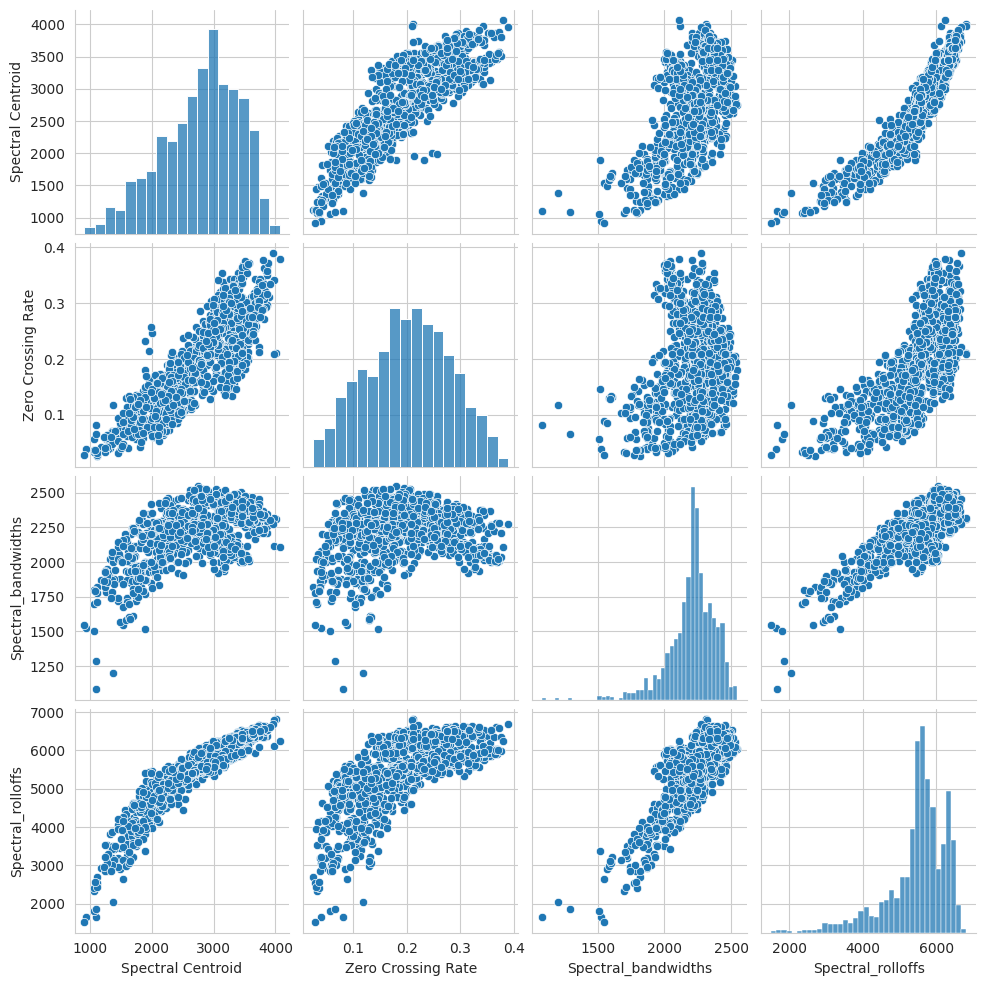

In [26]:
data = {
    "Spectral Centroid": spectral_centroids,
    "Zero Crossing Rate": zero_crossing_rates,
    "Spectral_bandwidths": spectral_bandwidths,
    "Spectral_rolloffs": spectral_rolloffs
}

df = pd.DataFrame(data)

sns.pairplot(df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

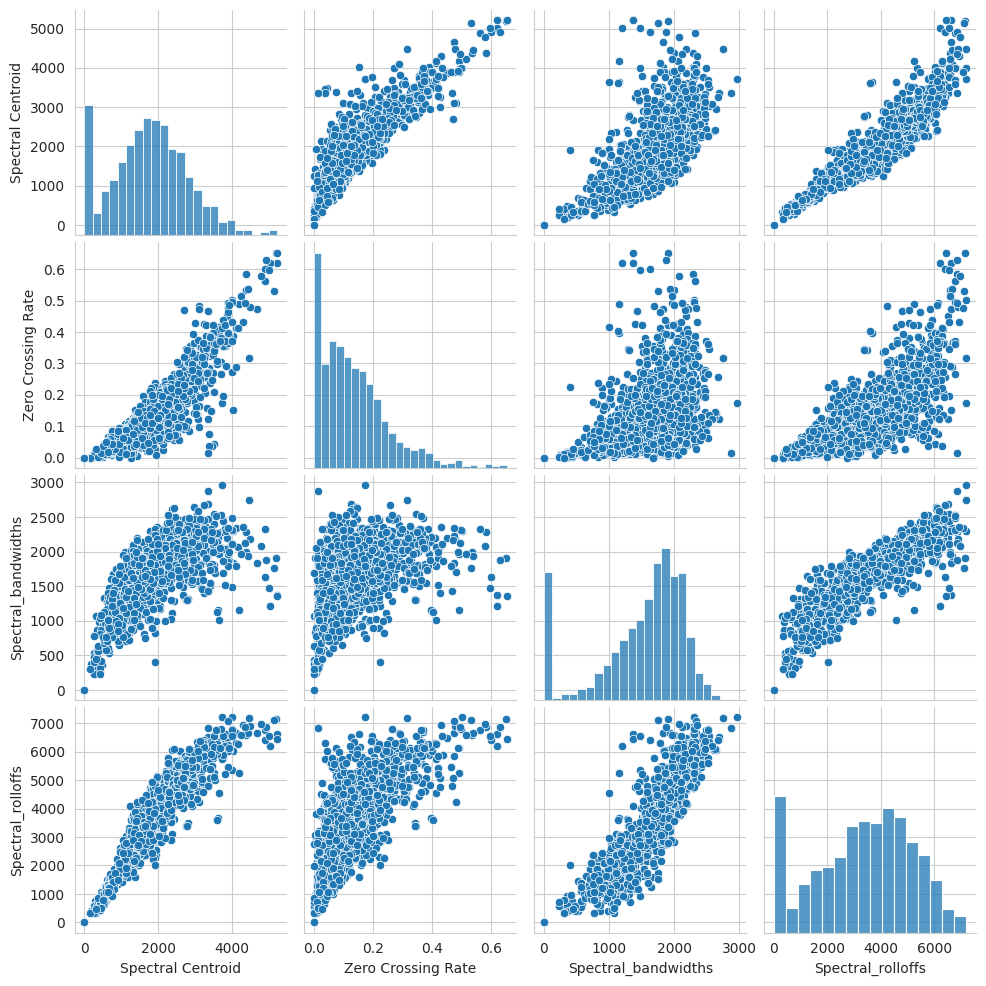

In [27]:
data2 = {
    "Spectral Centroid": spectral_centroids2,
    "Zero Crossing Rate": zero_crossing_rates2,
    "Spectral_bandwidths": spectral_bandwidths2,
    "Spectral_rolloffs": spectral_rolloffs2
}

df2 = pd.DataFrame(data2)

sns.pairplot(df2)
plt.show()

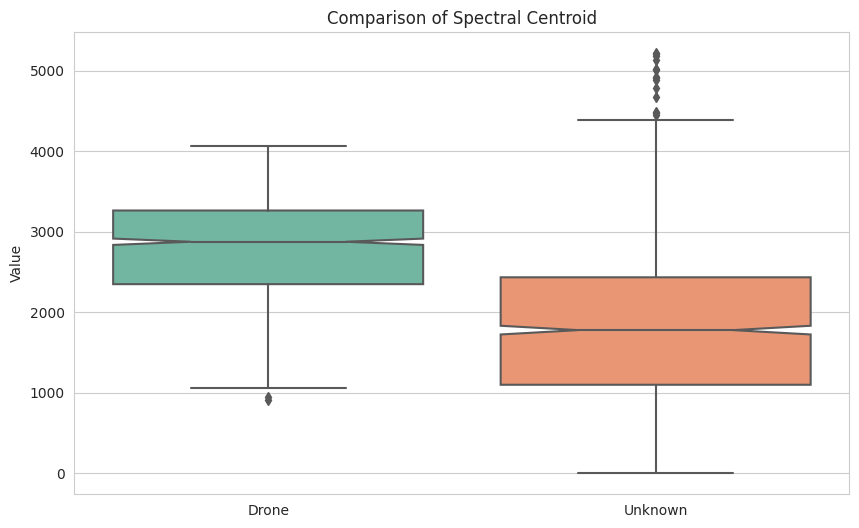

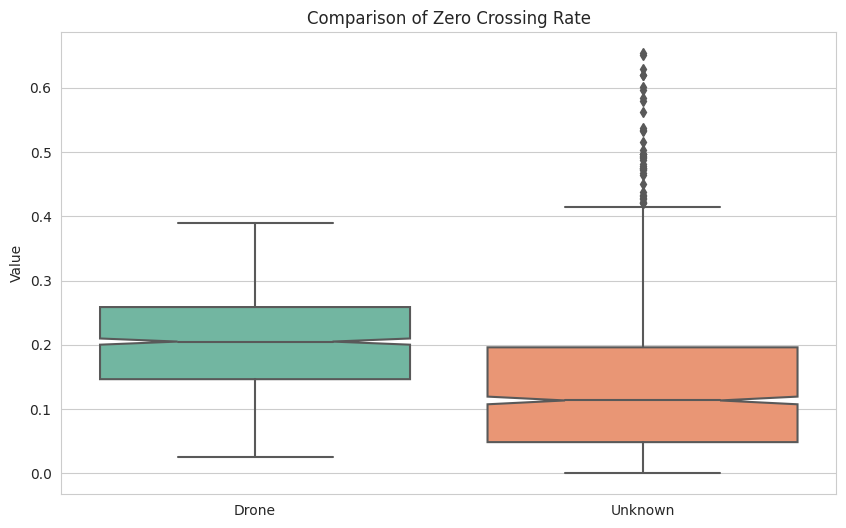

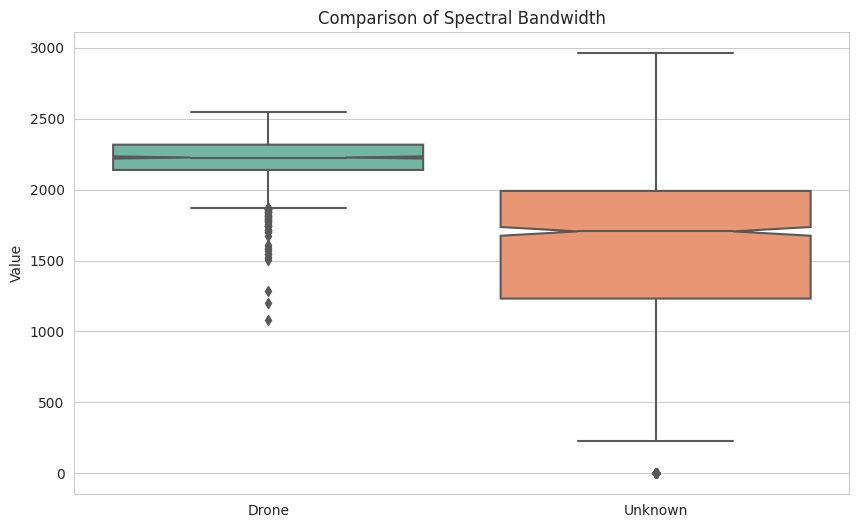

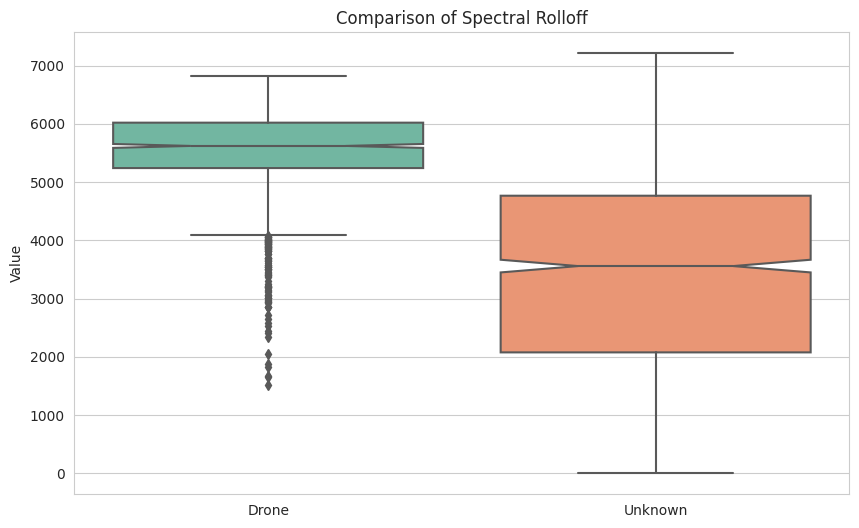

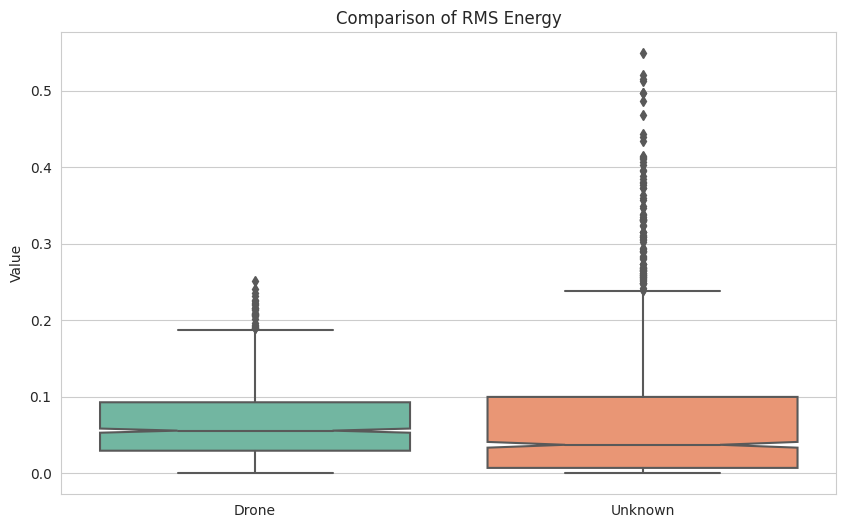

In [28]:
def extract_features(file_list):
    features = {
        'Spectral Centroid': [],
        'Zero Crossing Rate': [],
        'Spectral Bandwidth': [],
        'Spectral Rolloff': [],
        'RMS Energy': []
    }

    for file in file_list:
        audio, sr = librosa.load(file, sr=None)
        features['Spectral Centroid'].append(np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr)))
        features['Zero Crossing Rate'].append(np.mean(librosa.feature.zero_crossing_rate(y=audio)))
        features['Spectral Bandwidth'].append(np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sr)))
        features['Spectral Rolloff'].append(np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sr)))
        features['RMS Energy'].append(np.mean(librosa.feature.rms(y=audio)))

    return features

drone_features = extract_features(drone_audio)
unknown_features = extract_features(unknown_audio)

def plot_feature_comparison(drone_features, unknown_features, feature_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[drone_features[feature_name], unknown_features[feature_name]], 
                notch=True, 
                palette="Set2")
    plt.xticks([0, 1], ['Drone', 'Unknown'])
    plt.title(f'Comparison of {feature_name}')
    plt.ylabel('Value')
    plt.show()

for feature in drone_features:
    plot_feature_comparison(drone_features, unknown_features, feature)

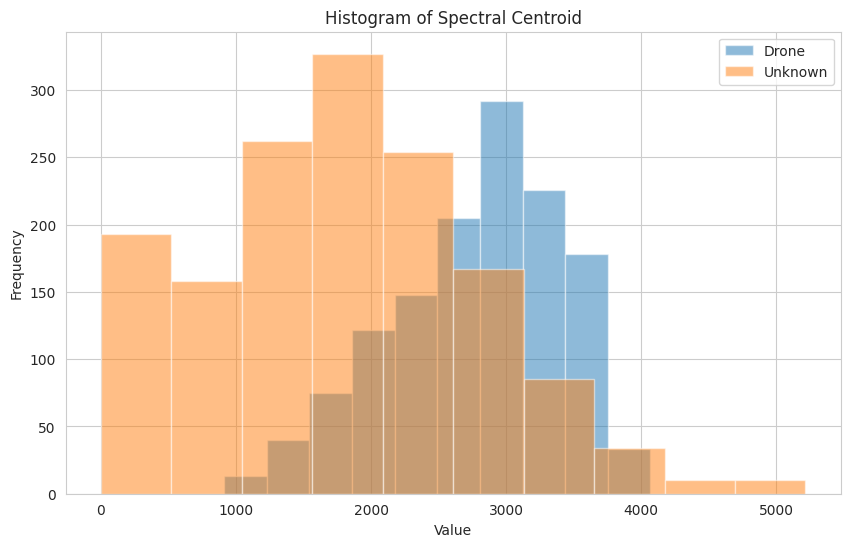

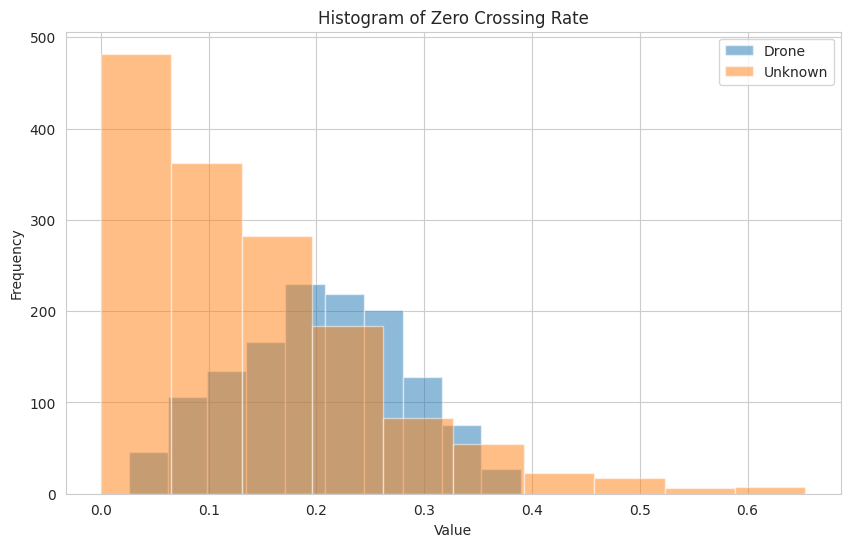

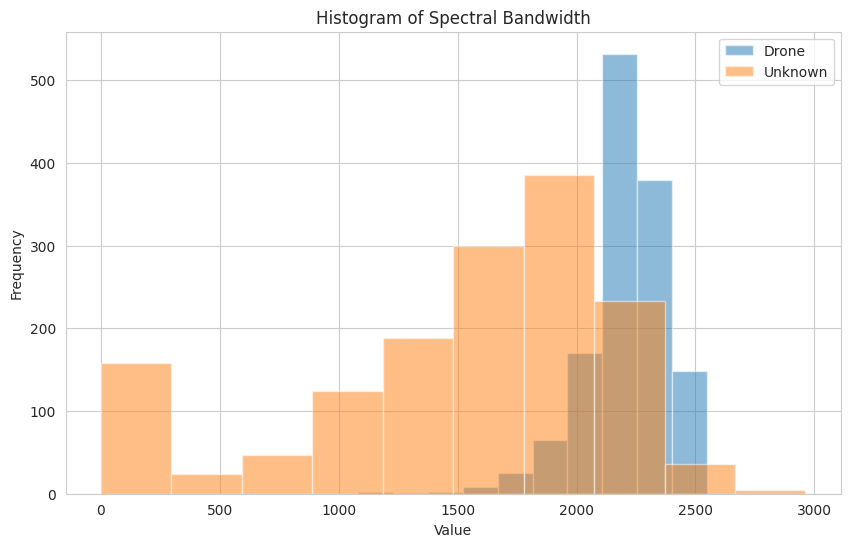

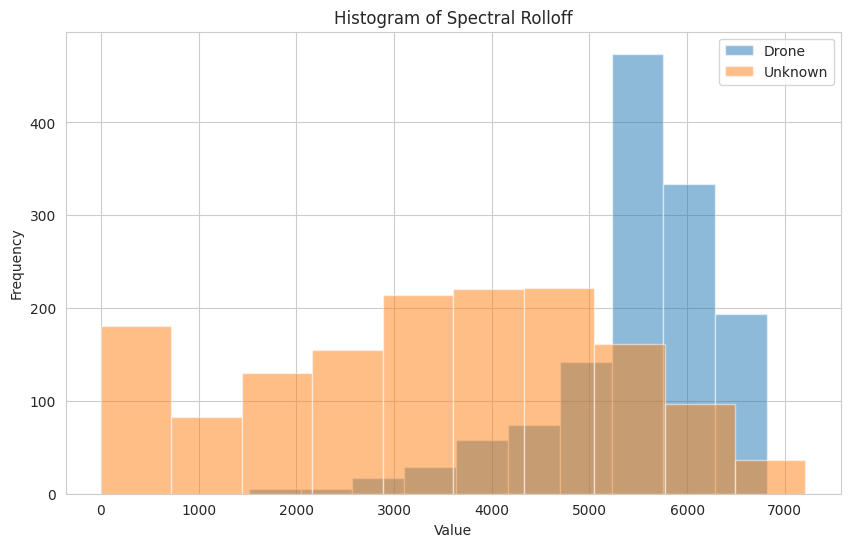

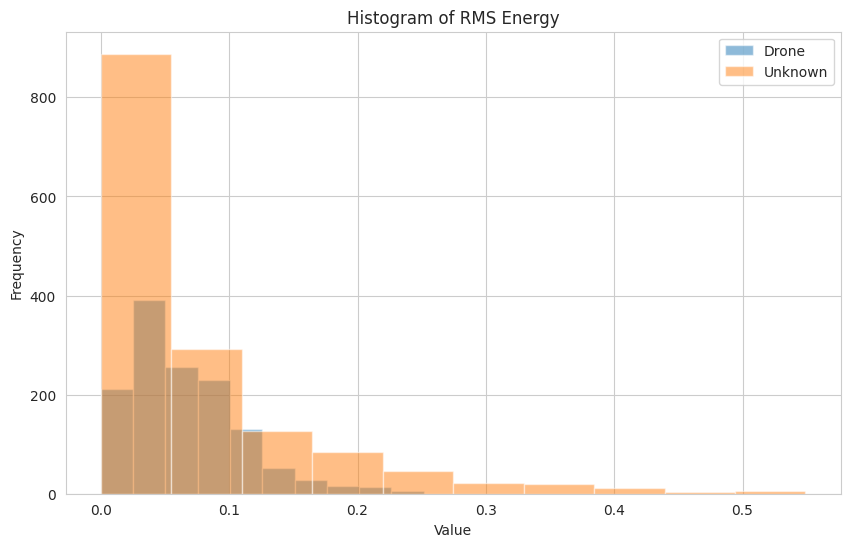

In [29]:
def plot_feature_histogram(drone_features, unknown_features, feature_name):
    plt.figure(figsize=(10, 6))
    plt.hist(drone_features[feature_name], alpha=0.5, label='Drone')
    plt.hist(unknown_features[feature_name], alpha=0.5, label='Unknown')
    plt.title(f'Histogram of {feature_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

for feature in drone_features:
    plot_feature_histogram(drone_features, unknown_features, feature)

**Data preprocessing, Features extraction**

Sample rate :  22050


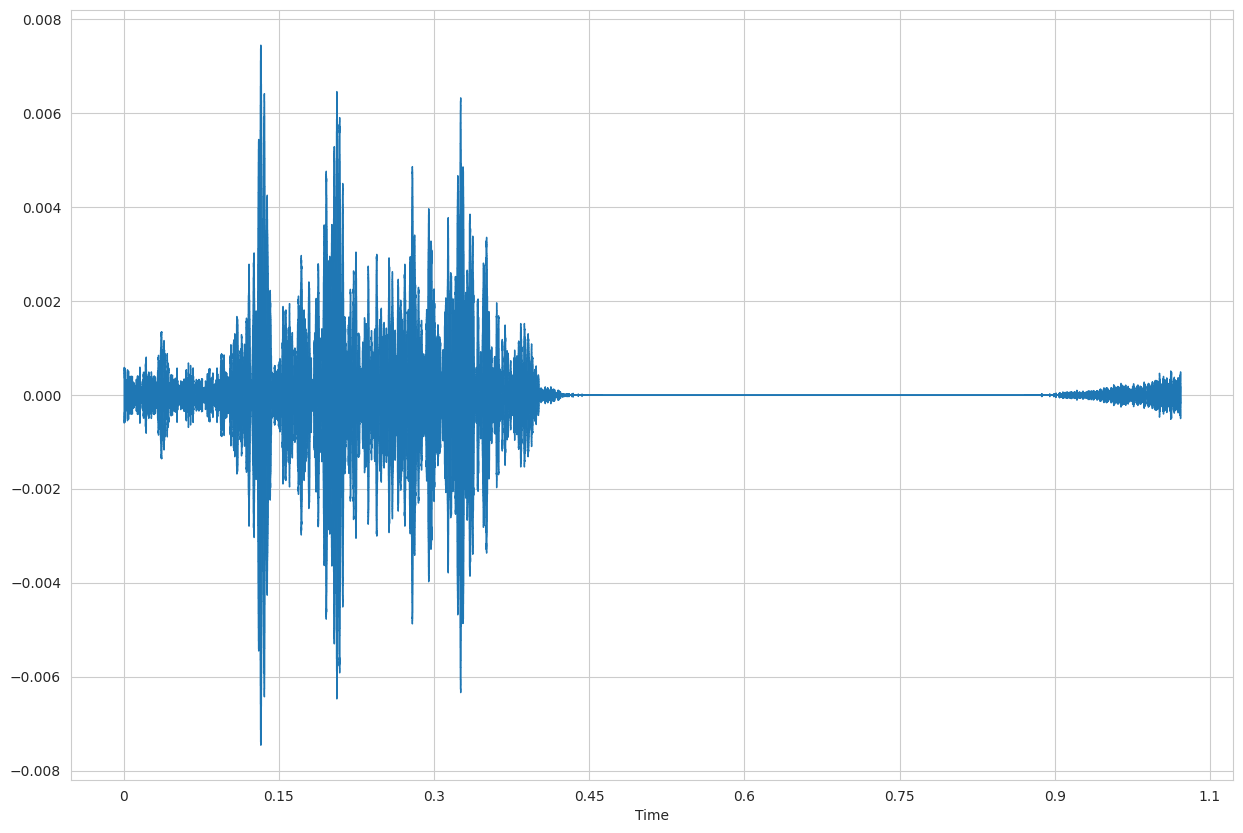

In [30]:
plt.figure(figsize=(15,10))
filename= unknown_audio[np.random.randint(0, len(unknown_audio))]
librosa_data,librosa_sample_rate=librosa.load(filename)
librosa.display.waveshow(librosa_data, sr=sample_rate)
print("Sample rate : " , librosa_sample_rate)
ipd.Audio(filename)

Sample rate :  16000


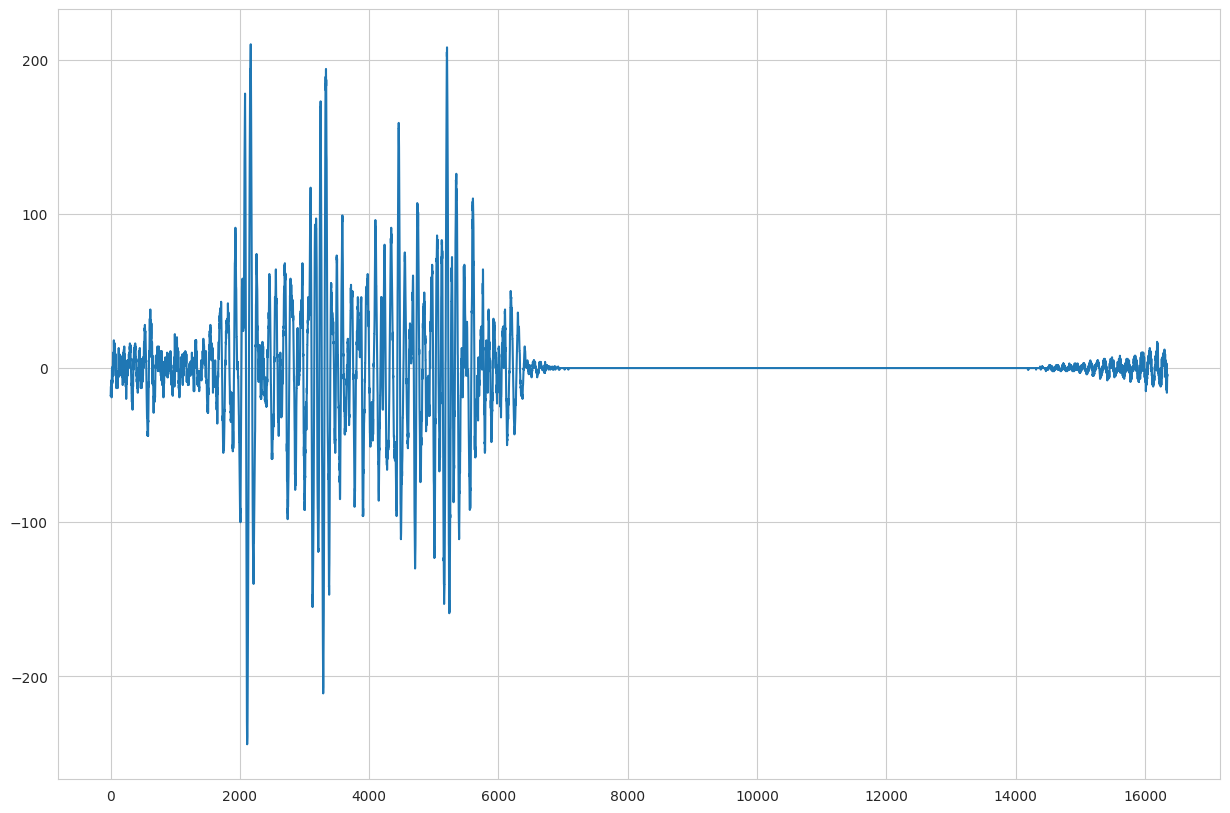

In [31]:
wave_sample_rate, wave_audio = wav.read(filename)
print("Sample rate : " , wave_sample_rate)   

plt.figure(figsize=(15,10))
plt.plot(wave_audio)
plt.show()

In [32]:
mfccs= librosa.feature.mfcc(y=librosa_data, sr=librosa_sample_rate , n_mfcc=40)
mfccs.shape

(40, 45)

In [33]:
mfccs

array([[-7.13312744e+02, -6.93963501e+02, -6.93928467e+02, ...,
        -7.68315002e+02, -7.53317322e+02, -7.68557922e+02],
       [ 1.10505295e+02,  1.26353790e+02,  1.25042450e+02, ...,
         9.38007050e+01,  1.05449112e+02,  1.17173286e+02],
       [-1.68821297e+01, -2.96381454e+01, -3.61952286e+01, ...,
        -4.90964737e+01, -4.94337044e+01, -3.38676300e+01],
       ...,
       [ 7.08300054e-01, -2.61147547e+00, -3.09823704e+00, ...,
        -2.47108388e+00, -4.36612129e+00, -5.39411640e+00],
       [ 1.08223391e+00,  4.57601690e+00,  4.17420959e+00, ...,
        -7.79592693e-02, -2.67863393e-01,  1.12324190e+00],
       [ 3.31074500e+00,  2.46178389e+00,  9.10867691e-01, ...,
         4.70501041e+00,  4.44207907e+00,  2.11309099e+00]], dtype=float32)

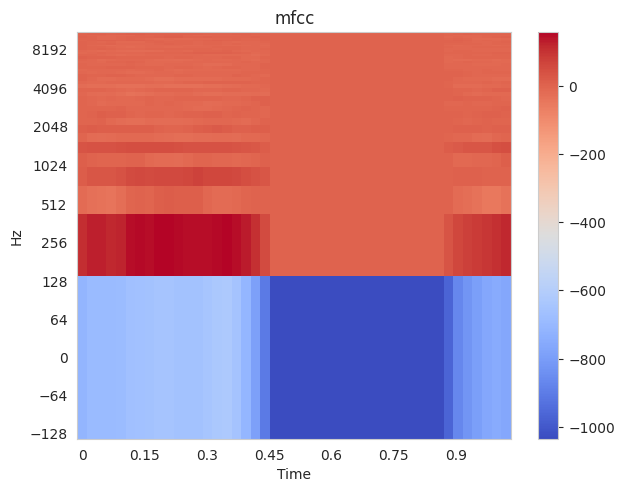

In [34]:
librosa.display.specshow(mfccs, x_axis='time',y_axis='log')
plt.colorbar()
plt.tight_layout()
plt.title('mfcc')
plt.show()

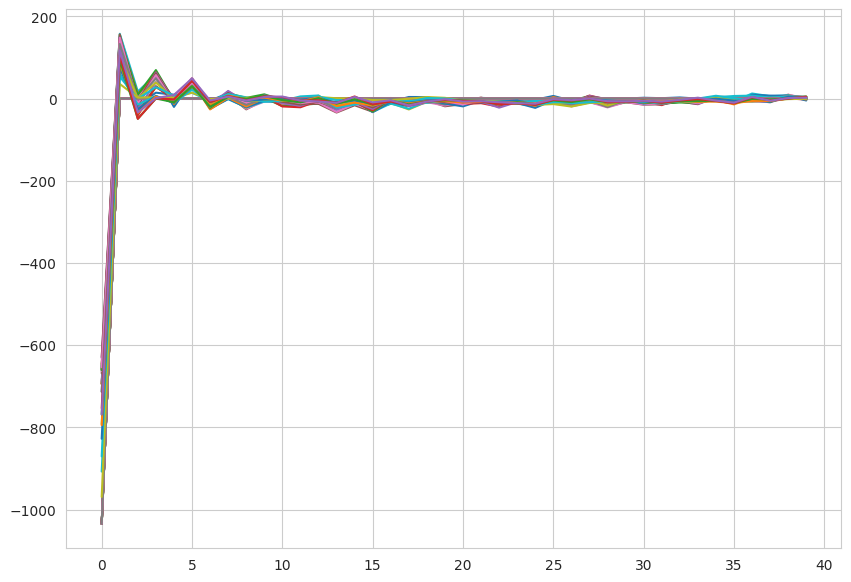

In [35]:
plt.figure(figsize=(10,7))
plt.plot(mfccs)
plt.show()

In [36]:
D=librosa.stft(librosa_data)
D

array([[-6.2243752e-03+0.0000000e+00j, -3.0419664e-03+0.0000000e+00j,
        -1.7437815e-04+0.0000000e+00j, ...,
         1.0320897e-04+0.0000000e+00j,  2.0763982e-04+0.0000000e+00j,
        -5.3408876e-04+0.0000000e+00j],
       [ 5.9562470e-03+3.2704687e-04j,  2.6154454e-04+2.8707422e-03j,
        -2.5186531e-04+8.2863371e-06j, ...,
         1.0558363e-04+2.7319515e-04j, -6.0965156e-04-1.5187940e-04j,
         6.9943187e-04-6.0431543e-04j],
       [-5.7888799e-03-1.3182051e-03j,  1.7317114e-03+6.9674436e-04j,
         1.0049348e-03+4.6900654e-04j, ...,
        -2.6972982e-04-3.5678188e-04j,  3.5077092e-04-2.7143455e-04j,
        -8.0190739e-04+9.3760289e-04j],
       ...,
       [-1.8934277e-04+1.0110067e-06j,  9.4419214e-05-5.0478587e-07j,
        -1.0297482e-09-7.1827544e-11j, ...,
        -2.7544303e-10+2.8236627e-10j, -2.3837749e-05-1.1521216e-08j,
         4.7687197e-05+2.2090843e-08j],
       [ 1.8934351e-04-5.0556895e-07j, -2.5244239e-07-9.4418858e-05j,
         4.5606435e-10

In [37]:
S_db=librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 45)

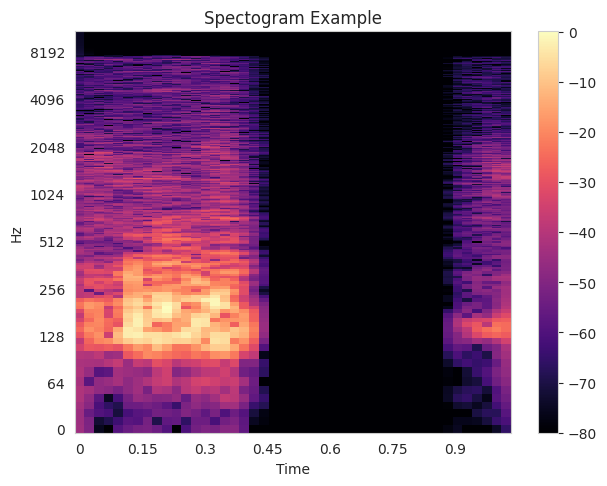

In [38]:
librosa.display.specshow(S_db, x_axis='time',y_axis='log')
plt.colorbar()
plt.tight_layout()
plt.title('Spectogram Example')
plt.show()

In [39]:
S=librosa.feature.melspectrogram(y = librosa_data, sr= librosa_sample_rate, n_mels=128)
S

array([[4.0904733e-06, 9.1999800e-07, 8.9840675e-08, ..., 1.0726192e-08,
        4.8490715e-08, 2.0267629e-07],
       [6.4318142e-06, 2.4758326e-06, 1.1728761e-06, ..., 2.2176097e-08,
        2.0172719e-07, 7.5323157e-07],
       [6.7422789e-06, 3.5190114e-06, 3.3903468e-06, ..., 7.0926518e-08,
        5.9624074e-07, 2.1842377e-06],
       ...,
       [3.4080894e-09, 8.4725116e-10, 3.0919682e-18, ..., 1.2719803e-19,
        5.5347848e-11, 2.2153604e-10],
       [3.3655949e-09, 8.3681001e-10, 2.2420906e-19, ..., 2.5653520e-20,
        5.3955566e-11, 2.1594229e-10],
       [3.3392165e-09, 8.3032642e-10, 2.0007584e-19, ..., 1.8980730e-20,
        5.3098709e-11, 2.1250078e-10]], dtype=float32)

In [40]:
S_db_mel=librosa.amplitude_to_db(S, ref=np.max)
S_db_mel.shape

(128, 45)

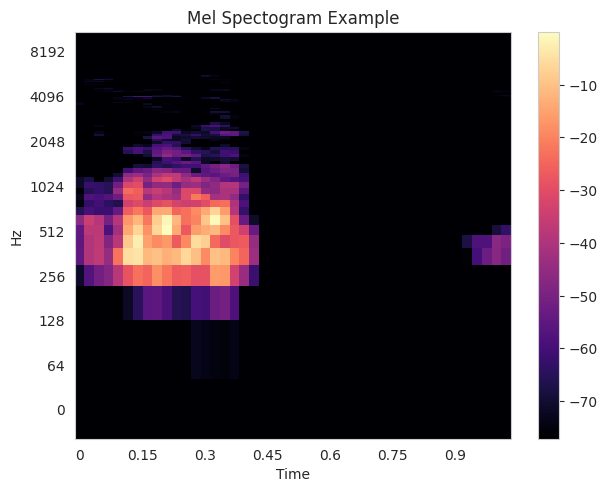

In [41]:
librosa.display.specshow(S_db_mel, x_axis='time',y_axis='log')
plt.colorbar()
plt.tight_layout()
plt.title('Mel Spectogram Example')
plt.show()

In [42]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [43]:
%%time
extracted_features1=[]

for i in unknown_audio:
    final_class_labels= "Unknown"
    data =features_extractor(i)
    extracted_features1.append([data,final_class_labels])

CPU times: user 1min 18s, sys: 1min 2s, total: 2min 21s
Wall time: 36.9 s


In [44]:
extracted_features1[:10]

[[array([-3.6065823e+02,  1.6417683e+02, -4.5540977e+01,  4.7074352e+01,
         -2.6893887e+01,  4.4652481e+01, -3.2504296e+00,  1.5668710e+01,
          7.5107694e+00, -5.8684915e-01,  8.6442575e+00, -1.1178572e+01,
          1.8969751e+01,  4.9901745e-01,  7.5951238e+00, -8.1115717e-01,
          5.7760730e+00,  3.0378411e+00,  1.4078058e-01,  1.0944662e+01,
          2.1453674e+00,  9.6611595e+00,  7.9000890e-01,  9.9015989e+00,
          4.6525068e+00,  3.9739411e+00,  5.9473977e+00,  2.4589477e+00,
          7.1256742e+00, -7.3219001e-02,  2.3330402e+00, -2.1307397e+00,
          2.1274328e+00,  1.3090357e-01, -2.2402098e+00, -9.2156768e-02,
          1.1798948e-03,  3.2321239e+00, -5.1921940e-01,  6.1803854e-01],
        dtype=float32),
  'Unknown'],
 [array([-2.97442902e+02,  1.48479919e+02, -4.95502129e+01,  6.84916840e+01,
         -2.46249504e+01,  4.04028015e+01, -6.83552086e-01,  1.36717978e+01,
          2.23168433e-01, -2.76344466e+00,  9.50706291e+00, -8.45193863e+00,


In [45]:
len(extracted_features1)

1500

In [46]:
%%time

extracted_features2=[]
for i in drone_audio:
    final_class_labels= "Drone"
    data =features_extractor(i)
    extracted_features2.append([data,final_class_labels])

CPU times: user 1min 9s, sys: 56.2 s, total: 2min 5s
Wall time: 32.7 s


In [47]:
len(extracted_features2)

1332

In [114]:
extracted_features = extracted_features1 + extracted_features2

In [186]:
len(extracted_features)

2832

In [187]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature    class
0  [-360.65823, 164.17683, -45.540977, 47.074352,...  Unknown
1  [-297.4429, 148.47992, -49.550213, 68.491684, ...  Unknown
2  [-460.30627, 69.060974, -0.15220606, 102.19083...  Unknown
3  [-270.28693, 127.21304, -33.969204, 21.074951,...  Unknown
4  [-228.07274, 138.20964, -84.93492, 22.119984, ...  Unknown

In [51]:
extracted_features_df.tail(10)

feature  class
2822  [-161.56384, 83.52589, -113.38062, 89.894844, ...  Drone
2823  [-131.27263, 142.36479, -67.40799, 80.98717, -...  Drone
2824  [-253.13895, 93.83602, -52.541233, 82.28114, -...  Drone
2825  [-278.43207, 65.449524, -75.33597, 88.15605, -...  Drone
2826  [-125.07, 86.852715, -72.72133, 91.65432, -23....  Drone
2827  [-367.62427, 65.532974, -67.93965, 87.346245, ...  Drone
2828  [-127.38066, 82.51368, -72.15812, 86.01432, -2...  Drone
2829  [-166.46352, 92.98553, -121.51965, 94.88498, -...  Drone
2830  [-218.1729, 76.37961, -99.96816, 83.47443, -51...  Drone
2831  [-158.25404, 90.810005, -99.62411, 71.0531, -5...  Drone

In [52]:
extracted_features_df['class'].value_counts()

class
Unknown    1500
Drone      1332
Name: count, dtype: int64

In [188]:
df = extracted_features_df
df.head()

feature    class
0  [-360.65823, 164.17683, -45.540977, 47.074352,...  Unknown
1  [-297.4429, 148.47992, -49.550213, 68.491684, ...  Unknown
2  [-460.30627, 69.060974, -0.15220606, 102.19083...  Unknown
3  [-270.28693, 127.21304, -33.969204, 21.074951,...  Unknown
4  [-228.07274, 138.20964, -84.93492, 22.119984, ...  Unknown

In [54]:
df.dtypes

feature    object
class      object
dtype: object

**SVM Modeling**

In [55]:
df_svm = df.copy()
df_svm.head()

feature    class
0  [-360.65823, 164.17683, -45.540977, 47.074352,...  Unknown
1  [-297.4429, 148.47992, -49.550213, 68.491684, ...  Unknown
2  [-460.30627, 69.060974, -0.15220606, 102.19083...  Unknown
3  [-270.28693, 127.21304, -33.969204, 21.074951,...  Unknown
4  [-228.07274, 138.20964, -84.93492, 22.119984, ...  Unknown

In [56]:
df_svm['class'].replace(['Unknown','Drone'],[0,1],inplace=True)
df_svm.head()

feature  class
0  [-360.65823, 164.17683, -45.540977, 47.074352,...      0
1  [-297.4429, 148.47992, -49.550213, 68.491684, ...      0
2  [-460.30627, 69.060974, -0.15220606, 102.19083...      0
3  [-270.28693, 127.21304, -33.969204, 21.074951,...      0
4  [-228.07274, 138.20964, -84.93492, 22.119984, ...      0

In [57]:
X=np.array(df_svm['feature'].tolist())
y=np.array(df_svm['class'].tolist())

In [58]:
X

array([[-3.6065823e+02,  1.6417683e+02, -4.5540977e+01, ...,
         3.2321239e+00, -5.1921940e-01,  6.1803854e-01],
       [-2.9744290e+02,  1.4847992e+02, -4.9550213e+01, ...,
        -3.2234666e+00, -5.5480947e+00, -8.9326096e-01],
       [-4.6030627e+02,  6.9060974e+01, -1.5220606e-01, ...,
         4.9752197e-01, -2.6573873e+00, -1.8791107e+00],
       ...,
       [-1.6646352e+02,  9.2985527e+01, -1.2151965e+02, ...,
         1.9534543e+00,  7.9768949e+00, -4.2366233e+00],
       [-2.1817290e+02,  7.6379608e+01, -9.9968163e+01, ...,
         2.2525718e+00, -2.3471642e+00, -2.4716988e+00],
       [-1.5825404e+02,  9.0810005e+01, -9.9624107e+01, ...,
         2.3876503e+00, -9.0821290e-01, -5.5014205e-01]], dtype=float32)

In [59]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [60]:
print(X.shape)
print(y.shape)

(2832, 40)
(2832,)


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [62]:
X_train.shape , X_test.shape

((1982, 40), (850, 40))

In [63]:
y_train.shape, y_test.shape

((1982,), (850,))

**Linear Kernel**

In [64]:
from sklearn.svm import SVC
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [65]:
from sklearn.metrics import classification_report,accuracy_score
predictions_linear = clf_linear.predict(X_test)
print(classification_report(y_test, predictions_linear))
print("Accuracy is : " , accuracy_score(y_test, predictions_linear))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       465
           1       0.94      0.96      0.95       385

    accuracy                           0.95       850
   macro avg       0.95      0.95      0.95       850
weighted avg       0.95      0.95      0.95       850

Accuracy is :  0.9541176470588235


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions_linear)

array([[441,  24],
       [ 15, 370]])

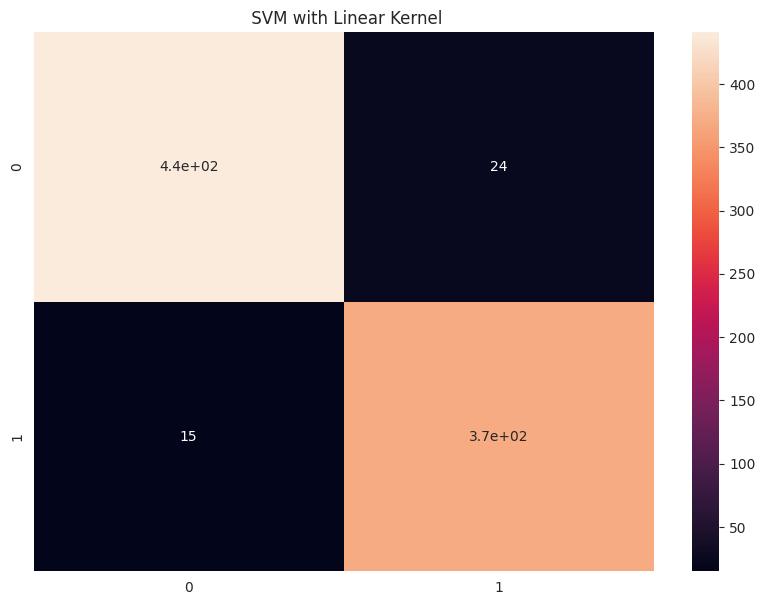

In [66]:
plt.figure(figsize=(10,7))
plt.title(" SVM with Linear Kernel")
sns.heatmap(confusion_matrix(y_test,predictions_linear),annot=True)
plt.show()

**Polynomial Kernel**

In [76]:
clf_poly = SVC(kernel='poly', degree= 3)
clf_poly.fit(X_train, y_train)
 
predictions_poly = clf_poly.predict(X_test)
print(classification_report(y_test, predictions_poly))
print("Accuracy is : " , accuracy_score(y_test, predictions_poly))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       465
           1       0.80      0.97      0.87       385

    accuracy                           0.87       850
   macro avg       0.88      0.88      0.87       850
weighted avg       0.89      0.87      0.87       850

Accuracy is :  0.8741176470588236


In [77]:
confusion_matrix(y_test,predictions_poly)

array([[369,  96],
       [ 11, 374]])

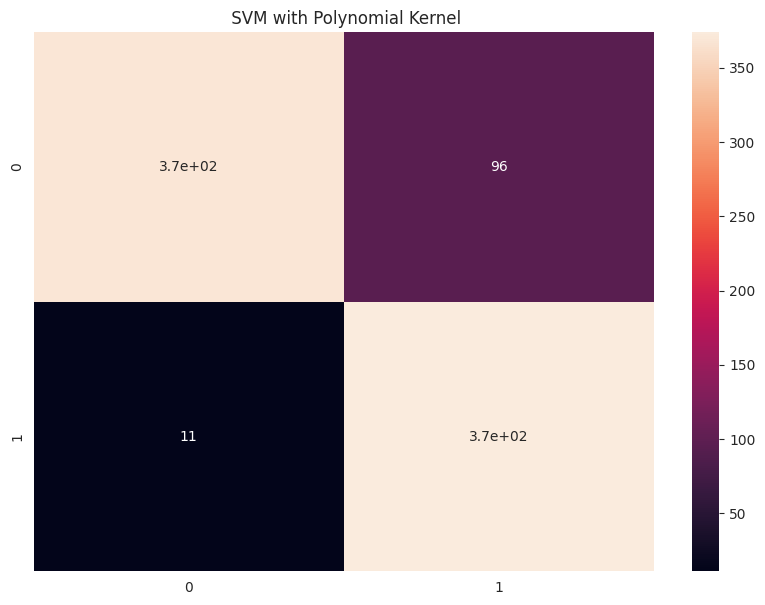

In [78]:
plt.figure(figsize=(10,7))
plt.title(" SVM with Polynomial Kernel")
sns.heatmap(confusion_matrix(y_test,predictions_poly),annot=True)
plt.show()

**Quadratic Kernel**

In [79]:
clf_quad = SVC(kernel='poly',degree=2)
clf_quad.fit(X_train, y_train)
 
predictions_quad = clf_quad.predict(X_test)
print(classification_report(y_test, predictions_quad))
print("Accuracy is : " , accuracy_score(y_test, predictions_quad))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       465
           1       0.89      0.95      0.92       385

    accuracy                           0.92       850
   macro avg       0.92      0.92      0.92       850
weighted avg       0.92      0.92      0.92       850

Accuracy is :  0.9211764705882353


In [80]:
confusion_matrix(y_test,predictions_quad)

array([[419,  46],
       [ 21, 364]])

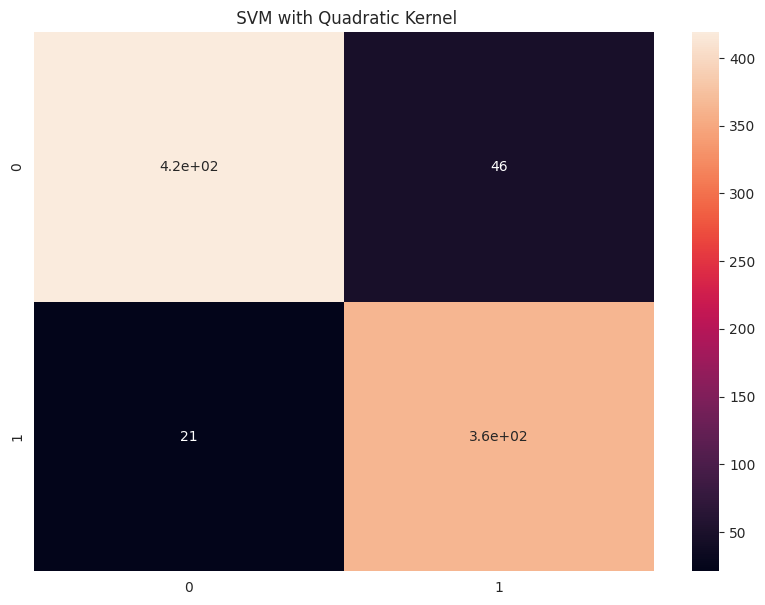

In [81]:
plt.figure(figsize=(10,7))
plt.title(" SVM with Quadratic Kernel")
sns.heatmap(confusion_matrix(y_test,predictions_quad),annot=True)
plt.show()

**RBF Kernel**

In [82]:
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
 
predictions_rbf = clf_rbf.predict(X_test)
print(classification_report(y_test, predictions_rbf))
print("Accuracy is : " , accuracy_score(y_test, predictions_rbf))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       465
           1       0.92      0.96      0.94       385

    accuracy                           0.94       850
   macro avg       0.94      0.94      0.94       850
weighted avg       0.94      0.94      0.94       850

Accuracy is :  0.9411764705882353


In [83]:
confusion_matrix(y_test,predictions_rbf)

array([[432,  33],
       [ 17, 368]])

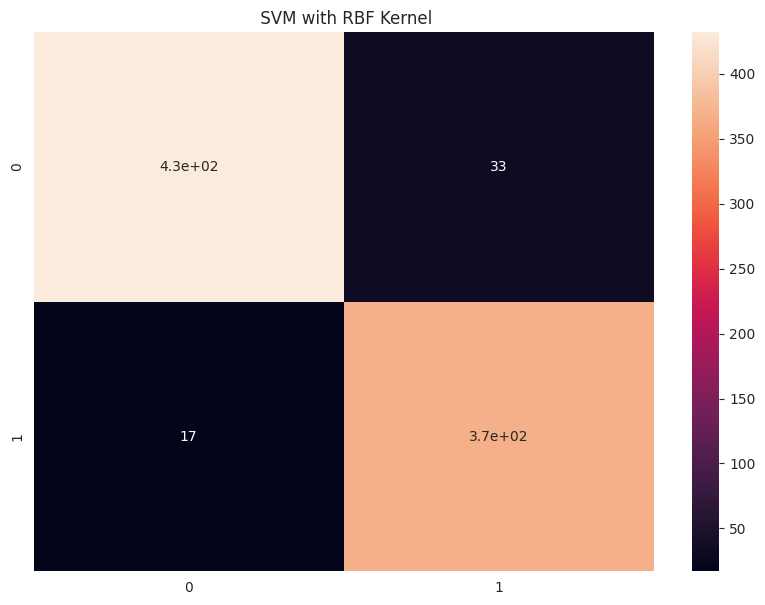

In [84]:
plt.figure(figsize=(10,7))
plt.title(" SVM with RBF Kernel")
sns.heatmap(confusion_matrix(y_test,predictions_rbf),annot=True)
plt.show()

/tmp/ipykernel_43/230516459.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,4)


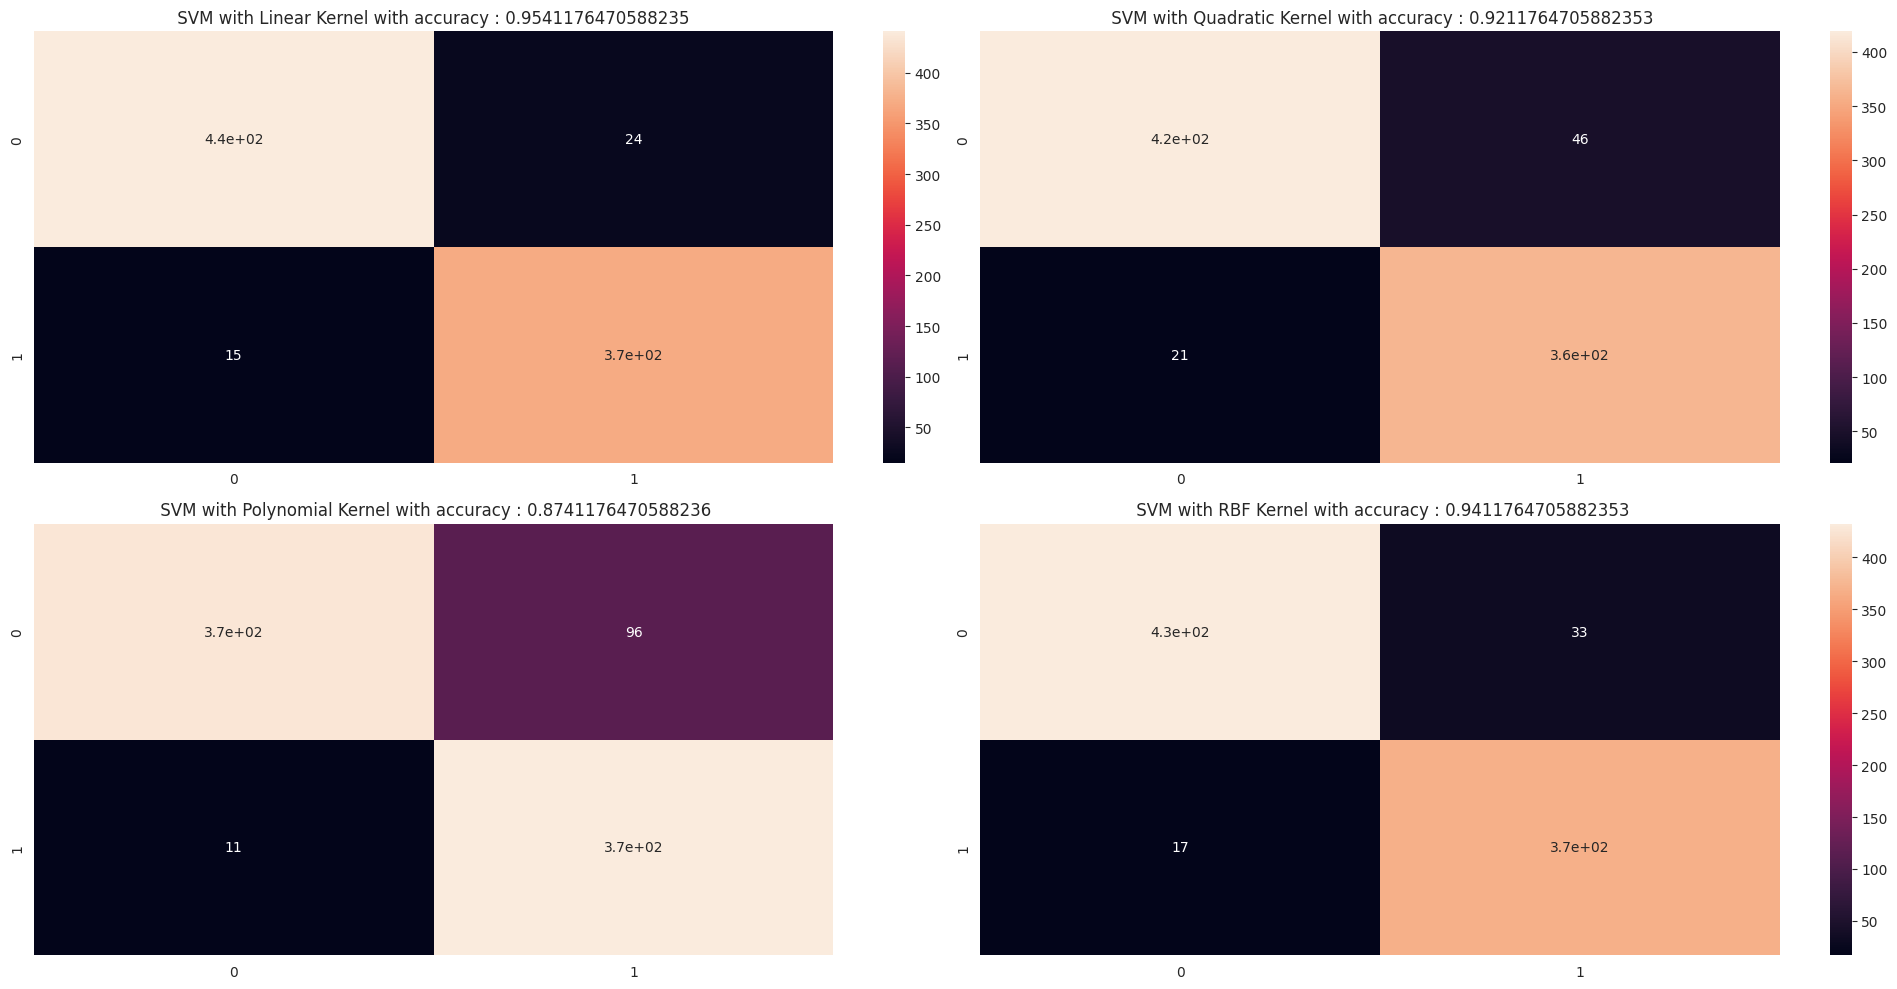

In [91]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title(f" SVM with Linear Kernel with accuracy : {accuracy_score(y_test, predictions_linear)} ")
sns.heatmap(confusion_matrix(y_test,predictions_linear),annot=True)
plt.tight_layout()

plt.subplot(2,2,2)
plt.title(f" SVM with Quadratic Kernel with accuracy : {accuracy_score(y_test, predictions_quad)}")
sns.heatmap(confusion_matrix(y_test,predictions_quad),annot=True)
plt.tight_layout()


plt.subplot(2,2,3)
plt.title(f" SVM with Polynomial Kernel with accuracy : {accuracy_score(y_test, predictions_poly)}")
sns.heatmap(confusion_matrix(y_test,predictions_poly),annot=True)
plt.tight_layout()


plt.subplot(2,2,4)
plt.title(f" SVM with RBF Kernel with accuracy : {accuracy_score(y_test, predictions_rbf)}")
sns.heatmap(confusion_matrix(y_test,predictions_rbf),annot=True)
plt.tight_layout()

**ANN**

In [198]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [208]:
df_ann = df.copy()
df_ann['class'].replace(['Unknown','Drone'],[0,1],inplace=True)
X=np.array(df_ann['feature'].tolist())
y=np.array(df_ann['class'].tolist())
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [209]:
num_labels = 2
model=Sequential()

model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [210]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               4100      
                                                                 
 activation_11 (Activation)  (None, 100)               0         
                                                                 
 dropout_18 (Dropout)        (None, 100)               0         
                                                                 
 dense_28 (Dense)            (None, 200)               20200     
                                                                 
 dropout_19 (Dropout)        (None, 200)               0         
                                                                 
 dense_29 (Dense)            (None, 100)               20100     
                                                                 
 activation_12 (Activation)  (None, 100)             

In [211]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [212]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 128

checkpointer = ModelCheckpoint(filepath='/kaggle/working/best_model.h5', verbose=1, save_best_only=True)
start = datetime.now()

history= model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
 1/16 [>.............................] - ETA: 23s - loss: 32.6930 - accuracy: 0.5703
Epoch 1: val_loss improved from inf to 1.86990, saving model to /kaggle/working/best_model.h5
16/16 [==============================] - 2s 18ms/step - loss: 20.7260 - accuracy: 0.6070 - val_loss: 1.8699 - val_accuracy: 0.8612
Epoch 2/100
 1/16 [>.............................] - ETA: 0s - loss: 12.0336 - accuracy: 0.6875
Epoch 2: val_loss improved from 1.86990 to 1.05851, saving model to /kaggle/working/best_model.h5
16/16 [==============================] - 0s 7ms/step - loss: 8.5806 - accuracy: 0.7240 - val_loss: 1.0585 - val_accuracy: 0.8906
Epoch 3/100
 1/16 [>.............................] - ETA: 0s - loss: 5.8594 - accuracy: 0.7969
Epoch 3: val_loss improved from 1.05851 to 0.68518, saving model to /kaggle/working/best_model.h5
16/16 [==============================] - 0s 7ms/step - loss: 5.6991 - accuracy: 0.7704 - val_loss: 0.6852 - val_accuracy: 0.8835
Epoch 4/100
 1/16 [>.............

In [213]:
test_accuracy=model.evaluate(X_test,y_test)
print("Test accuracy is : " , test_accuracy[1] )

27/27 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9788
Test accuracy is :  0.9788235425949097


In [214]:
history.history["loss"]

[20.72598648071289,
 8.580583572387695,
 5.699077129364014,
 3.908034563064575,
 2.6051018238067627,
 2.1153640747070312,
 1.5345134735107422,
 1.3886092901229858,
 1.1372727155685425,
 1.0315864086151123,
 0.9633947014808655,
 0.860501229763031,
 0.7303813099861145,
 0.5523641109466553,
 0.6272565722465515,
 0.5153823494911194,
 0.4091387391090393,
 0.46369752287864685,
 0.4305638372898102,
 0.4004051089286804,
 0.31033340096473694,
 0.36109089851379395,
 0.3416137993335724,
 0.38302451372146606,
 0.305369108915329,
 0.3092503249645233,
 0.3255409002304077,
 0.2611371874809265,
 0.25391829013824463,
 0.2568309009075165,
 0.2869759798049927,
 0.22664202749729156,
 0.2337409406900406,
 0.2700182795524597,
 0.2371617704629898,
 0.23748601973056793,
 0.2161632925271988,
 0.2214210033416748,
 0.21601510047912598,
 0.21969924867153168,
 0.20521830022335052,
 0.18598845601081848,
 0.22224929928779602,
 0.18448801338672638,
 0.19085164368152618,
 0.21322621405124664,
 0.18170373141765594,
 0.

In [215]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["accuracy"])
    ax2.plot(history.history["val_accuracy"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

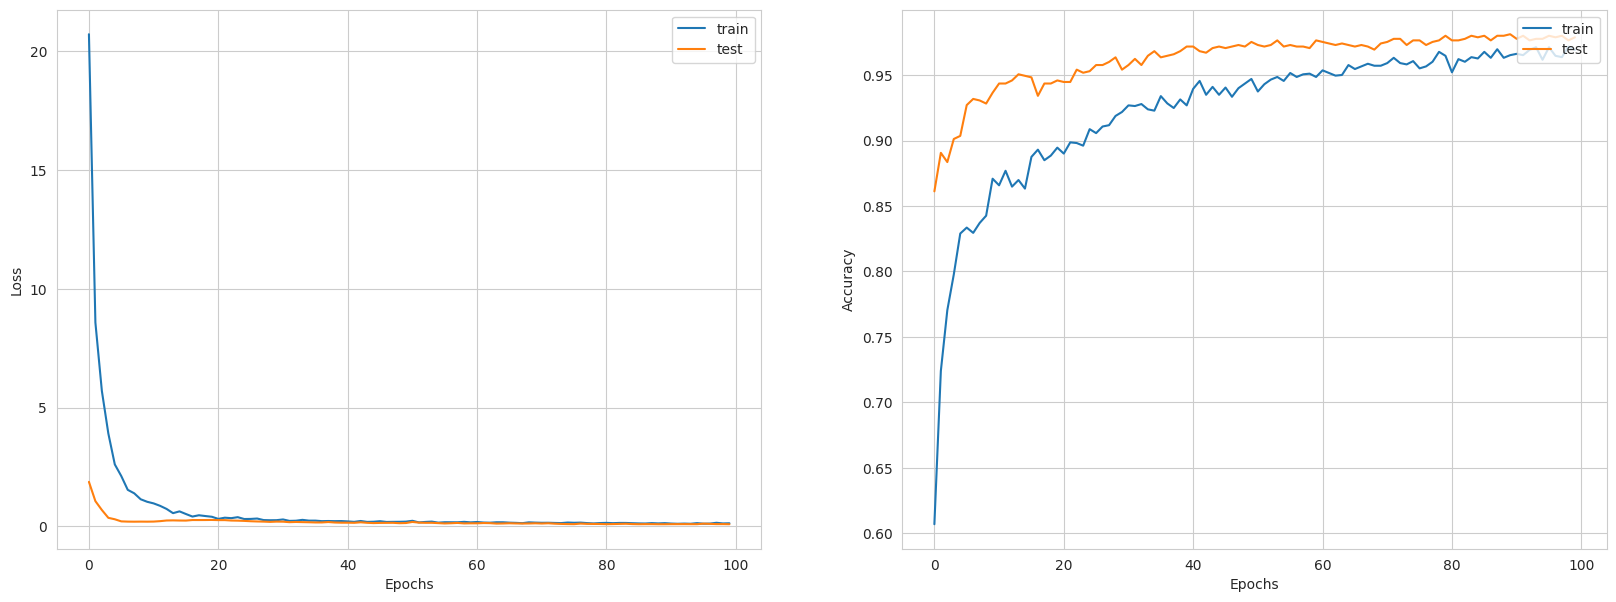

In [216]:
display_learning_curves(history)

In [232]:
filename=drone_audio[432]
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)

predicted_label= model.predict(prediction_feature)
print(predicted_label)

1/1 [==============================] - 0s 39ms/step
[[0.02179056 0.9782095 ]]


In [234]:
filename=unknown_audio[786]
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)

predicted_label= model.predict(prediction_feature)
print(predicted_label)

1/1 [==============================] - 0s 33ms/step
[[0.9888809  0.01111915]]


**CNN**

In [292]:
df_cnn = df.copy()
df_cnn.head()

feature    class
0  [-360.65823, 164.17683, -45.540977, 47.074352,...  Unknown
1  [-297.4429, 148.47992, -49.550213, 68.491684, ...  Unknown
2  [-460.30627, 69.060974, -0.15220606, 102.19083...  Unknown
3  [-270.28693, 127.21304, -33.969204, 21.074951,...  Unknown
4  [-228.07274, 138.20964, -84.93492, 22.119984, ...  Unknown

In [293]:
max_length = 40

X = pad_sequences(df_cnn['feature'].tolist(), maxlen=max_length, padding='post')

X_reshaped = X_padded.reshape(X_padded.shape[0], 1, max_length, 1)

In [294]:
from tensorflow.keras.utils import to_categorical
y = df_cnn['class'].map({'Drone': 1, 'Unknown': 0}).values
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [295]:
X_train, X_test, y_train, y_test

(array([[[[ -99],
          [ 110],
          [ -47],
          ...,
          [   0],
          [   3],
          [   4]]],
 
 
        [[[-134],
          [  96],
          [ -65],
          ...,
          [   0],
          [  -4],
          [   0]]],
 
 
        [[[-240],
          [  60],
          [ -58],
          ...,
          [  -7],
          [   6],
          [   3]]],
 
 
        ...,
 
 
        [[[-367],
          [ 220],
          [   5],
          ...,
          [   2],
          [  -2],
          [   1]]],
 
 
        [[[-421],
          [  64],
          [ -30],
          ...,
          [   1],
          [   0],
          [  -1]]],
 
 
        [[[-207],
          [ 172],
          [ -45],
          ...,
          [   3],
          [   0],
          [   0]]]], dtype=int32),
 array([[[[-136],
          [  90],
          [ -83],
          ...,
          [   4],
          [  -3],
          [   0]]],
 
 
        [[[-244],
          [ 139],
          [ -57],
          ...,


In [303]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU

model = Sequential()

model.add(Conv2D(32, kernel_size=(1, 3), activation='relu', input_shape=(1, max_length, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))

model.add(Conv2D(64, (1, 3)))
model.add(LeakyReLU(alpha=0.1))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.3))  
model.add(Dense(2, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 1, 38, 32)         128       
                                                                 
 batch_normalization_20 (Ba  (None, 1, 38, 32)         128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 1, 19, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 1, 17, 64)         6208      
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 1, 17, 64)         0         
                                                                 
 batch_normalization_21 (Ba  (None, 1, 17, 64)       

In [304]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True, verbose=2)
model_checkpoint = ModelCheckpoint(filepath='/kaggle/working/best_model2.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

start = datetime.now()
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test), callbacks=[model_checkpoint, early_stopping], verbose=1, shuffle=True)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 0.5162 - accuracy: 0.8167 
Epoch 1: val_accuracy improved from -inf to 0.91358, saving model to /kaggle/working/best_model2.h5
18/18 [==============================] - 3s 20ms/step - loss: 0.4424 - accuracy: 0.8433 - val_loss: 0.2374 - val_accuracy: 0.9136
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 0.1545 - accuracy: 0.9519
Epoch 2: val_accuracy improved from 0.91358 to 0.96120, saving model to /kaggle/working/best_model2.h5
18/18 [==============================] - 0s 9ms/step - loss: 0.1537 - accuracy: 0.9510 - val_loss: 0.1179 - val_accuracy: 0.9612
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 0.1159 - accuracy: 0.9652
Epoch 3: val_accuracy improved from 0.96120 to 0.96296, saving model to /kaggle/working/best_model2.h5
18/18 [==============================] - 0s 11ms/step - loss: 0.1135 - accuracy: 0.9611 - val_loss: 0.1104 - val_accuracy: 0.9630
Epoch 4/100
13/18 [

In [305]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print("Test accuracy is : " , test_accuracy[1] )

Test accuracy is :  0.9823633432388306


In [306]:
history.history["loss"]

[0.44236961007118225,
 0.15366442501544952,
 0.11353027820587158,
 0.09147966653108597,
 0.07822532206773758,
 0.06670170277357101,
 0.058725662529468536,
 0.05540661886334419,
 0.04327833279967308,
 0.04321444407105446,
 0.034642357379198074,
 0.03441677987575531,
 0.02622525952756405,
 0.03256367892026901,
 0.028470367193222046,
 0.023442808538675308,
 0.02217664197087288,
 0.021398762241005898,
 0.019081193953752518,
 0.015234976075589657,
 0.015385530889034271,
 0.01118058804422617,
 0.014205357059836388,
 0.008220241405069828,
 0.008603431284427643,
 0.008643300272524357,
 0.01203556265681982,
 0.011551683768630028,
 0.007227235473692417,
 0.007208472583442926,
 0.005337221547961235,
 0.00671494472771883,
 0.005075369495898485,
 0.007149584591388702,
 0.005627896171063185,
 0.006164007820188999,
 0.00921219028532505,
 0.009003613144159317,
 0.012190825305879116]

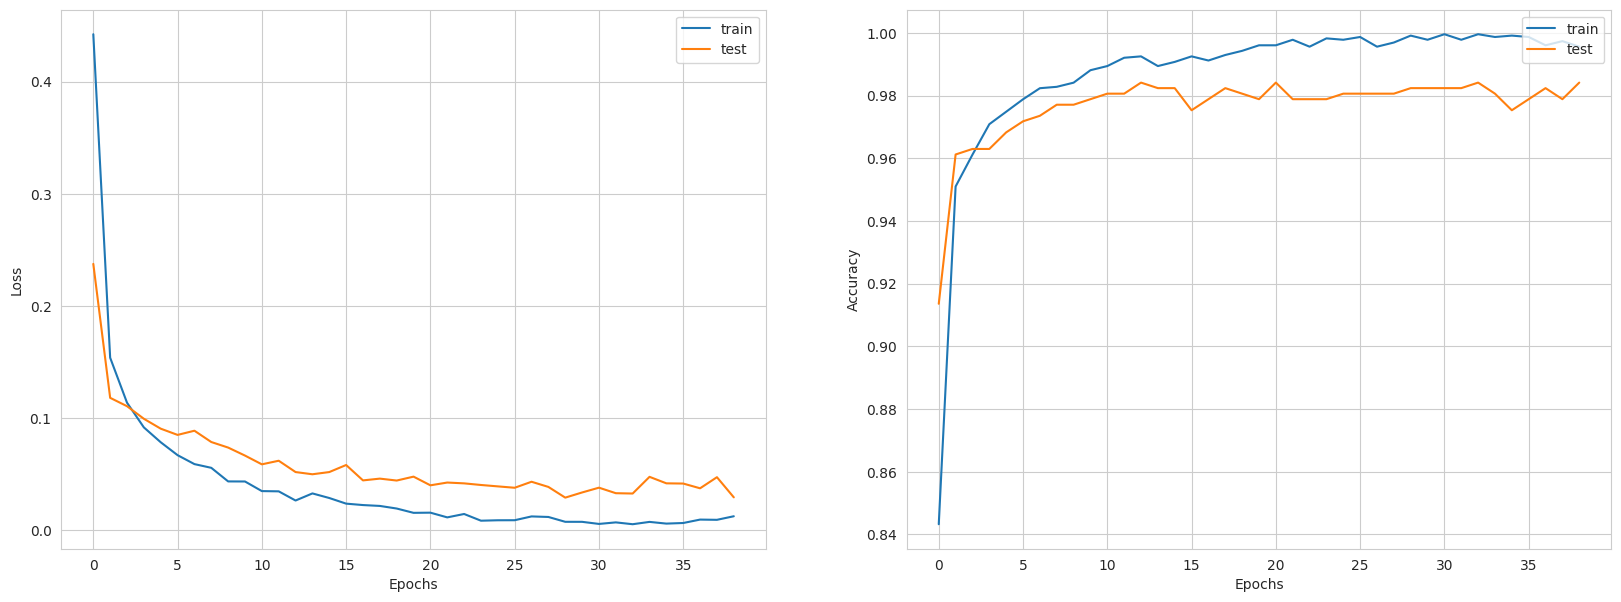

In [307]:
display_learning_curves(history)